# Predict Wildfires

# Project Description

- Wildfires in California pose a significant threat to lives, property, and the environment. Our primary goal is to utilize machine learning to offer investors in California guidance and insights related to wildfires for making informed decisions when purchasing investment properties.
- In our business narrative, we aim to empower real estate professionals and investors in California by integrating advanced ML models, like clustering, classification, and regression to assess wildfire risk accurately.
- In the data narrative, we emphasize the need for comprehensive datasets that encompass historical wildfire data, whether in various California counties, etc. factors to enable data-driven decision-making.

## **Experiments**

- Predict wildfires based on weather conditions and a few other factors.
- Which California counties are more prone to wildfires?
- Fire Danger Index and Fuel Moisture and how these values affect the predictions
- Temperature and precipitation yearly patterns in California


#importing Libraries

In [ ]:
%pip install shap
%pip install pandas_ta
%pip install hvplot
%pip install -q graphviz
%pip install scikit-plot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=e517461c79fd4d2b382cae745174dbd1913d0fcbe1e39538310706e41356f2d4
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 9.3 MB/s eta 0:00:00


In [ ]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from bs4 import BeautifulSoup as bs
import requests
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import matplotlib.style as style
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier
import shap
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import time
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pydotplus
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

#Data
- Data Set 1: Wiki sources link (we are scraping the data from links like this for each year): https://en.wikipedia.org/wiki/2020_California_wildfires
- Data set 2: Temperature: https://drive.google.com/file/d/1uMivJmKg5MrlDIM49vWcHF9nk_jP3Bk-/view?usp=sharing
- Data set 3:
Precipitation:   https://drive.google.com/file/d/1XztOWTvoaHI883WIRHBaxg8V1HAUk0MO/view?usp=sharing
- California counties:
https://drive.google.com/file/d/1JiSZIjOPbE6SScNiFmyclIMtxn5MNBFf/view?usp=sharing


- scrapping notebook link : https://drive.google.com/file/d/1y8xc7tRCXabL1cqQJ3TPOEv31vZB_vlX/view?usp=sharing



##Data Set 1

#### **Sourcing the Data:**
Our primary data source is Wikipedia, a comprehensive repository containing tables of wildfire data spanning the years from 2010 to 2023. These tables provide details on wildfire names, the counties affected, the area they engulfed, and other essential tidbits.

#### **Digging into the Early Years (2010-2015):**
We first turned our attention to the years 2010 through 2015:
- Using BeautifulSoup, we parsed the web pages corresponding to each year, hunting for the tables that held our data of interest.
- Post-retrieval, we pruned out extraneous data, ensuring only the columns we needed — the wildfire's name, county, acres affected, dates, and notes — remained.
- The extracted tables from each year were then amalgamated into a single dataframe, showcasing the combined data for this period.

###2010 - 2015

In [ ]:
from bs4 import BeautifulSoup as bs
import requests

link_list = ['wiki/2010_California_wildfires', 'wiki/2011_California_wildfires', 'wiki/2012_California_wildfires',
            'wiki/2013_California_wildfires', 'wiki/2014_California_wildfires', 'wiki/2015_California_wildfires']

soup_list = []
for i in link_list:
    url = 'https://en.wikipedia.org/'+i
    req = requests.get(url)
    soup = bs(req.text, 'html.parser')
    tables = soup.find('table',{'class':"wikitable"})
    soup_list.append(tables)

In [ ]:
table_list = []
for i in soup_list:
    tr = i.find_all('tr')
    for row in tr:
      if "Name" not in row.text and "Acres" not in row.text:
        row_data = [t.text.strip() for t in row]  # Extract data from row
        table_list.append(row_data)

In [ ]:
# convert the table_list to a dataframe which will contain all tables in one
tables = pd.DataFrame(table_list)
tables = tables.dropna(axis=1)
df = tables
even_indexed_columns = df.columns[::2]
# Drop the even-indexed columns
df = df.drop(columns=even_indexed_columns)
df = df.reset_index(drop=True)
df.head()
tables_2010_2015 = df

In [ ]:
tables_2010_2015

,1,3,5,7,9,11,13
0,Cotton,San Luis Obispo,"2,044",8.3,"May 15, 2010","May 17, 2010",
1,McKinley,Riverside,"1,000",4.0,"May 20, 2010","May 22, 2010",
2,Robinson,Merced,"1,600",6.5,"June 11, 2010","June 12, 2010",
3,Aliso,San Diego,"3,225",13.1,"July 13, 2010","July 13, 2010",
4,Sand 2,Kern,"1,254",5.1,"July 16, 2010","July 22, 2010",
...,...,...,...,...,...,...,...
168,Tesla,Alameda,"2,700",10.9,"August 19, 2015","August 22, 2015",
169,Butte,Amador,"70,868",286.8,"September 9, 2015","October 1, 2015",2 civilians fatalities475 residences & 343 out...
170,Valley,Lake,"76,067",307.8,"September 12, 2015","October 15, 2015","4 civilian fatalities, 1,955 structures destro..."
171,Tassajara,Monterey,"1,086",4.4,"September 19, 2015","September 27, 2015",1 civilian fatality


In [ ]:
# add column names
tables_2010_2015.columns = ['name', 'county', 'acres', 'KM2', 'start date', 'contained date', 'notes']
tables_2010_2015.head()
wildfires = tables_2010_2015
wildfires.tail(5)

wildfires = wildfires.drop('KM2', axis=1)
wildfires.head(1)

,name,county,acres,start date,contained date,notes
0,Cotton,San Luis Obispo,"2,044","May 15, 2010","May 17, 2010",


###2016 - 2022

#### **The Later Years (2016-2022):**
Following a similar modus operandi:
- We parsed the data for each year from 2016 to 2022.
- An extra step of data sanitation was applied here: We ensured that the dates were complete with the year, filling in gaps where they existed.
- As with the earlier years, we stitched together the tables into a singular dataframe.


In [ ]:
link_list = ['wiki/2016_California_wildfires', 'wiki/2017_California_wildfires', 'wiki/2018_California_wildfires',
             'wiki/2019_California_wildfires', 'wiki/2020_California_wildfires', 'wiki/2021_California_wildfires',
            'wiki/2022_California_wildfires']

soup_list = []
for i in link_list:
    url = 'https://en.wikipedia.org/'+i
    req = requests.get(url)
    soup = bs(req.text, 'html.parser')
    tables = soup.find('table',{'class':"wikitable"})
    soup_list.append(tables)

In [ ]:
table_list = []
year = 2016
for i in soup_list:
    tr = i.find_all('tr')
    for row in tr:
      if "Name" not in row.text and "Acres" not in row.text:
        row_data = [t.text.strip() for t in row]  # Extract data from row
        if len(row_data) == 14:  # Check if there are exactly 7 columns
          if str(year) not in row_data[7] :
            row_data[7] += ","+str(year)  # Append year to the 4th column
          if str(year) not in row_data[9] :
            row_data[9] += ","+str(year)  # Append year to the 9th column
        table_list.append(row_data)
    year+=1

In [ ]:
# convert the table_list to a dataframe which will contain all tables in one
tables = pd.DataFrame(table_list)
tables = tables.dropna(axis=1)
df = tables
even_indexed_columns = df.columns[::2]
# Drop the even-indexed columns
df = df.drop(columns=even_indexed_columns)
df = df.reset_index(drop=True)
df.head()
tables_2016_2023 = df

In [ ]:
# add column names
tables_2016_2023.columns = ['name', 'county', 'acres', 'start date', 'contained date', 'notes']
tables_2016_2023.head()

,name,county,acres,start date,contained date,notes
0,Roberts,San Luis Obispo,"3,712","May 18, 2016","May 20, 2016",
1,Metz,Monterey,"3,876","May 22, 2016","May 25, 2016",
2,Coleman,Monterey,"2,520","June 4, 2016","June 17, 2016",
3,Pony,Siskiyou,"2,860","June 7, 2016","June 30, 2016",
4,Sherpa,Santa Barbara,"7,474","June 15, 2016","July 12, 2016",


In [ ]:
wildfires = pd.concat([wildfires, tables_2016_2023], axis=0)
wildfires.tail(5)

,name,county,acres,start date,contained date,notes
319,Radford Fire,San Bernardino,"1,079","September 2, 2022","September 30, 2022","Burned near Big Bear Lake, has caused evacuati..."
320,Fairview Fire,Riverside,"28,307","September 5, 2022","October 5, 2022","Burned near Hemet, caused 2 fatalities and des..."
321,Mosquito Fire,"Placer, El Dorado","76,788","September 6, 2022","October 23, 2022",Burned near Foresthill and caused evacuations ...
322,Barnes Fire,Modoc,"5,843","September 7, 2022","October 13, 2022","Caused by lightning, burned near Fort Bidwell ..."
323,Fork Fire,Madera,819,"September 7, 2022","September 13, 2022","Caused by a vehicle, destroyed 43 structures n..."


##Data Set 2

##**Temperature**


### **Obtaining California's Temperature Data**

To analyze the potential effects of climate on wildfire trends in California, it becomes imperative to understand the temperature anomalies and fluctuations in different counties over the years. This brought us to the NOAA – the National Oceanic and Atmospheric Administration.
This dataset provides rich insights into the temperature variations across different California counties. With data points like anomalies, it opens the door for some deep dives – understanding if there's a link between the rising temperatures and the frequency or intensity of wildfires.

Weather data was downloaded from [NOAA](https://www.ncdc.noaa.gov/cag/county/mapping/4/tavg/202003/12/value) for both precipitation and temperature for the state of California.

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fileDownloaded = drive.CreateFile({'id':'1Chb_VQdd9o8uvz5XylnDLro45SCYr5gu'})
fileDownloaded.GetContentFile('Temperature.csv')
temp = pd.read_csv('Temperature.csv')
temp.head()

,ID,Name,State,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean,date
0,CA-001,Alameda County,California,53.9,126,4.4,49.5,201001
1,CA-003,Alpine County,California,35.0,120,4.7,30.3,201001
2,CA-005,Amador County,California,50.7,123,5.0,45.7,201001
3,CA-007,Butte County,California,52.1,124,5.2,46.9,201001
4,CA-009,Calaveras County,California,51.2,123,5.3,45.9,201001


##Data Set 3

##**Precipitation**

### **Unlocking Insights with California's Precipitation Data**

A comprehensive analysis of wildfires in California requires understanding not just temperature, but also precipitation patterns. Rainfall can be a critical factor in controlling fire spread. With this understanding, we turned to our reliable source – the NOAA – for the precipitation dataset.

In [ ]:
fileDownloaded = drive.CreateFile({'id':'1SWgz6uAtT1juxWTUL7hsiez4DgVcOZB3'})
fileDownloaded.GetContentFile('Precipitation.csv')
precip = pd.read_csv("Precipitation.csv")
precip.head()

,ID,Name,State,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean,date
0,CA-001,Alameda County,California,5.38,97,1.41,3.97,201001
1,CA-003,Alpine County,California,7.14,83,0.54,6.60,201001
2,CA-005,Amador County,California,7.61,86,0.91,6.70,201001
3,CA-007,Butte County,California,12.99,103,4.26,8.73,201001
4,CA-009,Calaveras County,California,6.72,78,0.06,6.66,201001


##Getting all California counties

In [ ]:
fileDownloaded = drive.CreateFile({'id':'1JiSZIjOPbE6SScNiFmyclIMtxn5MNBFf'})
fileDownloaded.GetContentFile('California_Counties.csv')
county_names = pd.read_csv("California_Counties.csv")
county_names.head()

,Latitude,the_geom,Name,Longitude
0,41.743438,MULTIPOLYGON (((-124.21284783991833 41.8708173...,Del Norte,-123.896950
1,41.592777,MULTIPOLYGON (((-123.51814169611895 42.0011639...,Siskiyou,-122.540597
2,41.589786,MULTIPOLYGON (((-121.44763489811575 41.9973336...,Modoc,-120.725183
3,40.698631,MULTIPOLYGON (((-124.06516973640174 41.4645760...,Humboldt,-123.873714
4,40.650636,MULTIPOLYGON (((-122.67701482828117 41.2803710...,Trinity,-123.112688


With the precipitation data at our fingertips, we're better positioned to investigate correlations with wildfires. Does higher rainfall imply fewer fires? Or is there a lag effect where a wet year is followed by a year of heightened fire activity due to vegetation growth? These are the kinds of insights we aim to uncover.

#Data Preprocessing

In [ ]:
# observe how many unique county names there are
wildfires.value_counts('county')
wildfires = wildfires.dropna(subset=['county'])

There are rows in the wildfires dataframe with multiple counties. Keep only the first listed county in a separate list and copy this new list to the county column in the wildfires dataframe.

In [ ]:
counties = []

for i in wildfires['county']:
    if ',' in i:
        c = i.split(',')[0]
        counties.append(c)
    elif '/' in i:
        c = i.split('/')[0]
        counties.append(c)
    else:
        counties.append(i)

In [ ]:
# replace the county column in wildfires with the counties list
wildfires['county_str'] = wildfires['county']
wildfires.loc[:,'county'] = counties
wildfires.head(1)

,name,county,acres,start date,contained date,notes,county_str
0,Cotton,San Luis Obispo,"2,044","May 15, 2010","May 17, 2010",,San Luis Obispo


We can create a separate dataframe where the total acerage burned in a year and in a month can be used in plotting.

In [ ]:
# convert the start_date to a datetime format and extract the month
df = pd.DataFrame(wildfires['start date'])
df['start date'] = df['start date'].str.replace(', ', ',')
wildfires['start date'] = pd.to_datetime(df['start date'], format='%B %d,%Y').dt.strftime('%Y-%m-%d')
wildfires.head()

,name,county,acres,start date,contained date,notes,county_str
0,Cotton,San Luis Obispo,"2,044",2010-05-15,"May 17, 2010",,San Luis Obispo
1,McKinley,Riverside,"1,000",2010-05-20,"May 22, 2010",,Riverside
2,Robinson,Merced,"1,600",2010-06-11,"June 12, 2010",,Merced
3,Aliso,San Diego,"3,225",2010-07-13,"July 13, 2010",,San Diego
4,Sand 2,Kern,"1,254",2010-07-16,"July 22, 2010",,Kern


In [ ]:
# extract the year into a new column
wildfires['year'] = pd.DatetimeIndex(wildfires['start date']).year
wildfires['month'] = pd.DatetimeIndex(wildfires['start date']).month
wildfires.head()

,name,county,acres,start date,contained date,notes,county_str,year,month
0,Cotton,San Luis Obispo,"2,044",2010-05-15,"May 17, 2010",,San Luis Obispo,2010,5
1,McKinley,Riverside,"1,000",2010-05-20,"May 22, 2010",,Riverside,2010,5
2,Robinson,Merced,"1,600",2010-06-11,"June 12, 2010",,Merced,2010,6
3,Aliso,San Diego,"3,225",2010-07-13,"July 13, 2010",,San Diego,2010,7
4,Sand 2,Kern,"1,254",2010-07-16,"July 22, 2010",,Kern,2010,7


In [ ]:
# convert the acres column to an interger
wildfires['acres'] = wildfires['acres'].str.replace(',', '') # remove the comma in the numbers
wildfires['acres'] = wildfires['acres'].astype(int) # convert column to integer
wildfires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            497 non-null    object
 1   county          497 non-null    object
 2   acres           497 non-null    int64 
 3   start date      497 non-null    object
 4   contained date  497 non-null    object
 5   notes           497 non-null    object
 6   county_str      497 non-null    object
 7   year            497 non-null    int64 
 8   month           497 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 38.8+ KB


In [ ]:
wildfires['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022])

In [ ]:
wildfires['month'].unique()

array([ 5,  6,  7,  8,  9, 10, 11,  1,  4,  2, 12])

In [ ]:
fires_total = wildfires.groupby(['county', 'year']).sum().reset_index()

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


In [ ]:
# sum the total number of acres burned per county
county_acres = wildfires.groupby('county')['acres'].sum().reset_index()
county_acres.head()

,county,acres
0,Alameda,2700
1,Alpine,97852
2,Amador,75346
3,Butte,1163135
4,Calaveras,4381


In [ ]:
# sort the acres column so the bargraph will be sorted in descending order.
county_sorted = county_acres.sort_values('acres')
county_sorted.head()

,county,acres
43,Santa Cruz,391
10,Glendora,1723
48,Stanislaus,2422
49,Sutter,2500
0,Alameda,2700


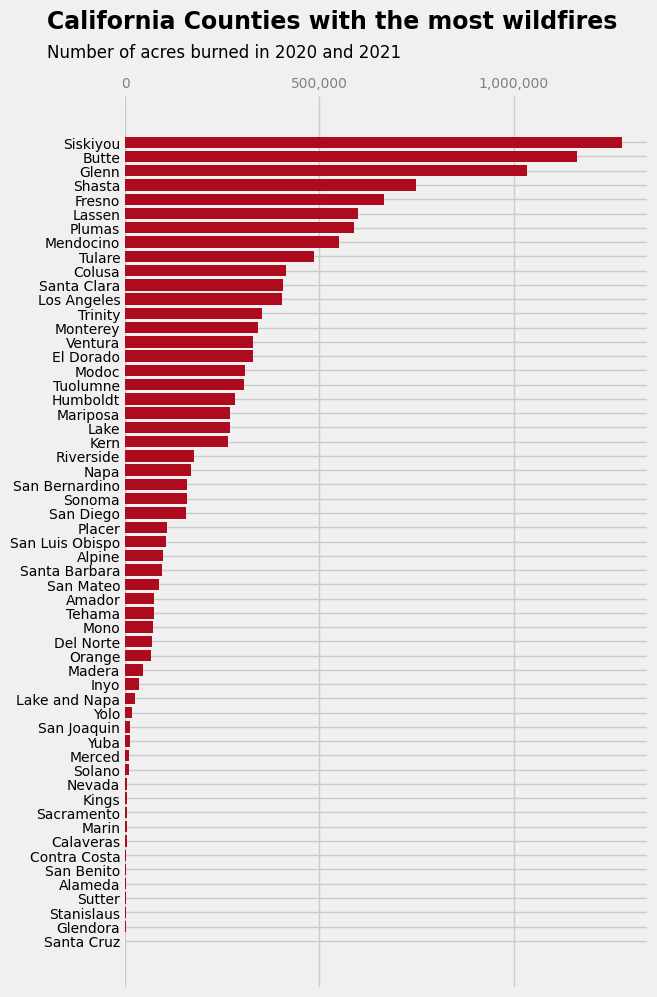

In [ ]:
# view this in a barplot
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight') # using the matplotlib style
fig, ax = plt.subplots(figsize=(6, 11))

ax.barh(county_sorted['county'],
        county_sorted['acres'],
        color='#af0b1e')

# Add a title
ax.text(x=-200000, y=64, s='California Counties with the most wildfires',
        size=17, weight='bold')
# Add a subtitle
ax.text(x=-200000, y=62, s='Number of acres burned in 2020 and 2021',
        size=12)

# create a for loop to remove all the spines
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)

# modify the x-axis tick labels
ax.set_xticks([0, 500000,  1000000])
ax.set_xticklabels(['0', '500,000', '1,000,000'])
ax.xaxis.tick_top()
ax.tick_params(left=False, top=False, axis='x', colors='grey', direction = 'out', length=1, labelsize=10)

# y-axis label size
ax.tick_params(axis='y', labelsize=10)
plt.show()

In [ ]:
# Generate a dataframe with the total acres burned per year
fires_total_yr = wildfires.groupby(['county', 'year', 'month']).sum().reset_index()
# add column stating wildfire
fires_total_yr['wildfire'] = 'wildfire'
fires_total_yr

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,county,year,month,acres,wildfire
0,Alameda,2015,8,2700,wildfire
1,Alpine,2020,8,26759,wildfire
2,Alpine,2021,6,1320,wildfire
3,Alpine,2021,7,69773,wildfire
4,Amador,2015,9,70868,wildfire
...,...,...,...,...,...
406,Yolo,2017,7,2269,wildfire
407,Yolo,2019,6,2512,wildfire
408,Yuba,2010,8,1307,wildfire
409,Yuba,2017,10,9989,wildfire


In [ ]:
# change the year column to an interger
fires_total_yr['year'] = fires_total_yr['year'].astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# change all Nan in acres to 0
fires_total_yr['acres'] = fires_total_yr['acres'].fillna(0)
fires_total_yr['month'] = fires_total_yr['month'].fillna(0)

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the data
fires_total_yr['county'] = label_encoder.fit_transform(fires_total_yr['county'])
county_names['Name'] = label_encoder.fit_transform(county_names['Name'])

###Adding the 'No Wildfire'

In [ ]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
months = [1,2,3,4,5,6,7,8,9,10,11,12]
c = county_names['Name']
all_combinations = pd.DataFrame([(year, month, county) for year in years for month in months for county in c],
                                 columns=['year', 'month', 'county'])
all_combinations.head()

fires_total_yr = pd.merge(fires_total_yr, all_combinations, on=['year', 'month', 'county'], how='outer')

# change all NaN in wildfire to 'no wildfire'
fires_total_yr['wildfire'] = fires_total_yr['wildfire'].replace(np.nan, 'no wildfire')
fires_total_yr['wildfire'].unique()

array(['wildfire', 'no wildfire'], dtype=object)

In [ ]:
fires_total_yr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8372 entries, 0 to 8371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   county    8372 non-null   int64  
 1   year      8372 non-null   int64  
 2   month     8372 non-null   int64  
 3   acres     411 non-null    float64
 4   wildfire  8372 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 392.4+ KB


### Transformation of the County Data

A list named `counties` was created, and through a loop, each entry in the 'county' column of the original dataframe was checked. If an entry had multiple counties separated by either a comma or a slash, only the first county was selected. All the transformed county names were then stored in this list.

Post this transformation, the original 'county' column in the `wildfires` dataframe was replaced with the new `counties` list. This means that each row now corresponds to a single county.

### Date Processing and Exploration

Dates are crucial for time series analysis and understanding trends. The 'start date' column, which indicates when each wildfire began, was the focus of our next preprocessing step.

To ensure the dates are in a consistent and analyzable format, the 'start date' entries were cleaned up by replacing any inconsistencies like ', ' (comma followed by space) with just a comma. Subsequently, a unique list of these cleaned dates was generated, highlighting all distinct dates when wildfires began.


#Discussion on Amalgamation of the Datasets

Almalgamating Temperature and Precipitation into one dataset called weather

In [ ]:
# Clean the column names of the tables
# define a function to standardize the column names.
def clean_col(col):
    col = col.strip()
    col = col.replace(" ", "_")
    col = col.lower()
    return col

# tidy the column names for the temp and precip dataframes
new_col = []
temp.head()
for i in temp.columns:
    c_new = clean_col(i)
    new_col.append(c_new)

temp.columns = new_col
temp.rename(columns = {'name': 'county'}, inplace = True)
temp.columns

Index(['id', 'county', 'state', 'value', 'rank',
       'anomaly_(1901-2000_base_period)', '1901-2000_mean', 'date'],
      dtype='object')

In [ ]:
temp['county'] = label_encoder.fit_transform(temp['county'])
temp['date'] = pd.to_datetime(temp['date'], format='%Y%m')

In [ ]:
# tidy the column names for the temp and precip dataframes
new_col = []
for i in precip.columns:
    c_new = clean_col(i)
    new_col.append(c_new)

precip.columns = new_col
precip.rename(columns = {'name': 'county'}, inplace = True)
precip.columns

Index(['id', 'county', 'state', 'value', 'rank',
       'anomaly_(1901-2000_base_period)', '1901-2000_mean', 'date'],
      dtype='object')

In [ ]:
precip['county_str'] = precip['county']
precip['county'] = label_encoder.fit_transform(precip['county'])
precip['date'] = pd.to_datetime(precip['date'], format='%Y%m')

In [ ]:
precip.dtypes

id                                         object
county                                      int64
state                                      object
value                                     float64
rank                                        int64
anomaly_(1901-2000_base_period)           float64
1901-2000_mean                            float64
date                               datetime64[ns]
county_str                                 object
dtype: object

In [ ]:
temp.dtypes

id                                         object
county                                      int64
state                                      object
value                                     float64
rank                                        int64
anomaly_(1901-2000_base_period)           float64
1901-2000_mean                            float64
date                               datetime64[ns]
dtype: object

In [ ]:
# merge the temp & precip dataframes by innerjoining them
weather = pd.merge(left=temp, right=precip, on=['county', 'date'], how='left')
weather = pd.DataFrame(weather)
weather.rename(columns = {'value_x':'Temperature', 'value_y':'Precipitation'}, inplace = True)

Converting the date column in the weather dataframe to a datetime object will help us extract the year for each row and allow us to analyze according to year.

In [ ]:
# Extract the year from the date column into a new column 'year'
weather['year'] = pd.DatetimeIndex(weather['date']).year

In [ ]:
# calculate z-score for temp column
weather['temp_norm'] = (weather['Temperature']- weather['Temperature'].mean()
                    )/ weather['Temperature'].std()
weather.head(1)

,id_x,county,state_x,Temperature,rank_x,anomaly_(1901-2000_base_period)_x,1901-2000_mean_x,date,id_y,state_y,Precipitation,rank_y,anomaly_(1901-2000_base_period)_y,1901-2000_mean_y,county_str,year,temp_norm
0,CA-001,0,California,53.9,126,4.4,49.5,2010-01-01,CA-001,California,5.38,97,1.41,3.97,Alameda County,2010,0.678507


In [ ]:
# log transform inches column
weather['precip_norm'] = np.log2(weather['Precipitation'] + 1)
weather.columns

Index(['id_x', 'county', 'state_x', 'Temperature', 'rank_x',
       'anomaly_(1901-2000_base_period)_x', '1901-2000_mean_x', 'date', 'id_y',
       'state_y', 'Precipitation', 'rank_y',
       'anomaly_(1901-2000_base_period)_y', '1901-2000_mean_y', 'county_str',
       'year', 'temp_norm', 'precip_norm'],
      dtype='object')

In [ ]:
weather['month'] = weather['date'].dt.month

##Amalgamating wildfires dataset with weather

In [ ]:
fires_total_yr.columns

Index(['county', 'year', 'month', 'acres', 'wildfire'], dtype='object')

In [ ]:
#DS1+DS2+DS3
# merge above dataframe with the weather_avg_yr
df4 = pd.merge(left=weather, right=fires_total_yr, how='inner', left_on =['county', 'month', 'year'], right_on=['county','month','year'])
df4.head()

,id_x,county,state_x,Temperature,rank_x,anomaly_(1901-2000_base_period)_x,1901-2000_mean_x,date,id_y,state_y,...,rank_y,anomaly_(1901-2000_base_period)_y,1901-2000_mean_y,county_str,year,temp_norm,precip_norm,month,acres,wildfire
0,CA-001,0,California,53.9,126,4.4,49.5,2010-01-01,CA-001,California,...,97,1.41,3.97,Alameda County,2010,0.678507,2.673556,1,NaN,no wildfire
1,CA-003,1,California,35.0,120,4.7,30.3,2010-01-01,CA-003,California,...,83,0.54,6.60,Alpine County,2010,-2.393692,3.025029,1,NaN,no wildfire
2,CA-005,2,California,50.7,123,5.0,45.7,2010-01-01,CA-005,California,...,86,0.91,6.70,Amador County,2010,0.158346,3.106013,1,NaN,no wildfire
3,CA-007,3,California,52.1,124,5.2,46.9,2010-01-01,CA-007,California,...,103,4.26,8.73,Butte County,2010,0.385917,3.806324,1,NaN,no wildfire
4,CA-009,4,California,51.2,123,5.3,45.9,2010-01-01,CA-009,California,...,78,0.06,6.66,Calaveras County,2010,0.239621,2.948601,1,NaN,no wildfire


In [ ]:
columns_to_drop = ['anomaly_(1901-2000_base_period)_x','1901-2000_mean_x','anomaly_(1901-2000_base_period)_y','1901-2000_mean_y', 'county_name', 'id_y', 'state_y', 'rank_y']
# Only drop columns that are actually in the dataframe
df4 = df4.drop(columns=[col for col in columns_to_drop if col in df4.columns])
df4

,id_x,county,state_x,Temperature,rank_x,date,Precipitation,county_str,year,temp_norm,precip_norm,month,acres,wildfire
0,CA-001,0,California,53.9,126,2010-01-01,5.38,Alameda County,2010,0.678507,2.673556,1,NaN,no wildfire
1,CA-003,1,California,35.0,120,2010-01-01,7.14,Alpine County,2010,-2.393692,3.025029,1,NaN,no wildfire
2,CA-005,2,California,50.7,123,2010-01-01,7.61,Amador County,2010,0.158346,3.106013,1,NaN,no wildfire
3,CA-007,3,California,52.1,124,2010-01-01,12.99,Butte County,2010,0.385917,3.806324,1,NaN,no wildfire
4,CA-009,4,California,51.2,123,2010-01-01,6.72,Calaveras County,2010,0.239621,2.948601,1,NaN,no wildfire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367,CA-051,25,California,34.1,119,2022-09-01,1.43,Mono County,2022,-2.539987,1.280956,9,5843.0,wildfire
8368,CA-063,31,California,38.0,117,2022-09-01,1.30,Plumas County,2022,-1.906041,1.201634,9,76788.0,wildfire
8369,CA-067,33,California,54.6,122,2022-09-01,0.46,Sacramento County,2022,0.792292,0.545968,9,28307.0,wildfire
8370,CA-073,36,California,54.4,111,2022-09-01,1.02,San Diego County,2022,0.759782,1.014355,9,1079.0,wildfire


In [ ]:
df4['acres'] = df4['acres'].fillna(0.0)
df4['wildfire'] = df4['wildfire'].replace(np.nan, 'no wildfire')
df4['wildfire'].unique()

array(['no wildfire', 'wildfire'], dtype=object)

In [ ]:
# we will also normalize the acres plot using a log2 transform.
df4['acres_norm'] = np.log2(df4['acres'] + 1)
df5 = df4[['county', 'year', 'temp_norm', 'precip_norm', 'wildfire', 'acres_norm', 'county_str']]
df5.head()

,county,year,temp_norm,precip_norm,wildfire,acres_norm,county_str
0,0,2010,0.678507,2.673556,no wildfire,0.0,Alameda County
1,1,2010,-2.393692,3.025029,no wildfire,0.0,Alpine County
2,2,2010,0.158346,3.106013,no wildfire,0.0,Amador County
3,3,2010,0.385917,3.806324,no wildfire,0.0,Butte County
4,4,2010,0.239621,2.948601,no wildfire,0.0,Calaveras County


#Exploratory Data Analysis and Visualization

### Observe if there is a relationship between temperature and precipitation.

Since the weather data is on a different scale, temp in degrees F and precipitation in inches. We need to preprocess the data to make them more similar.

Using quantiles is a good default if we want to transform it without inspecting the data's distribution but below we will inspect each individually since there's only 2 variables.



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: xlabel='Temperature', ylabel='Density'>

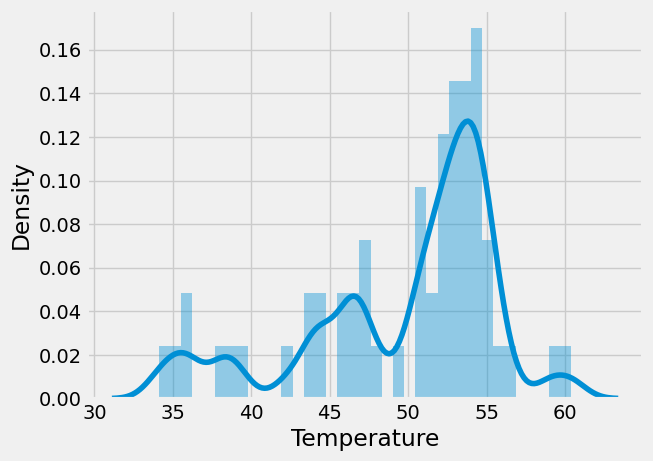

In [ ]:
# check the distribution of the temperature data
import seaborn as sns

sns.distplot(weather['Temperature'])



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: xlabel='Precipitation', ylabel='Density'>

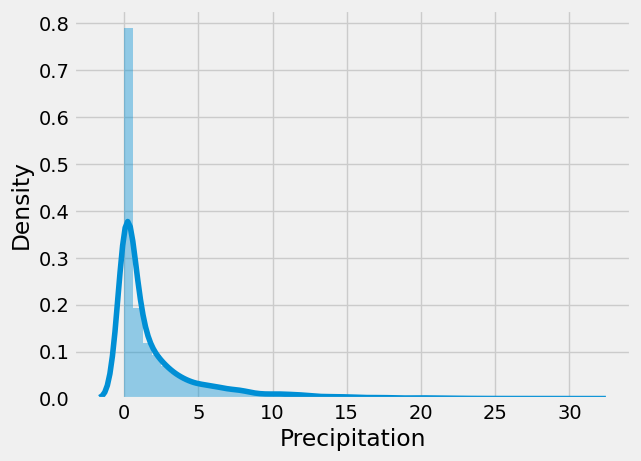

In [ ]:
# check distribution of precipitation
sns.distplot(weather['Precipitation'])

The distribution for the temperature is similar to a normal distriubtion and

---

can be normalized using a z-score.

The distribution for the precipitation is similar to a power law distribution which can be scaled using a log transform which was done previous normalization.

### Temp and precipitation yearly pattern

The relationship can be observed on a scatterplot for each year showing how the relationship changes differs for the last 12 years. It can be observed that when the temperature is above 60°F there is always low precipitation.

All three variables (year, temp and precipitation) can be overlayed. This helps visualize an overlay of all the years and looks like 2017 & 2019 had the most wettest seasons compared to the other years.


<Figure size 800x800 with 0 Axes>

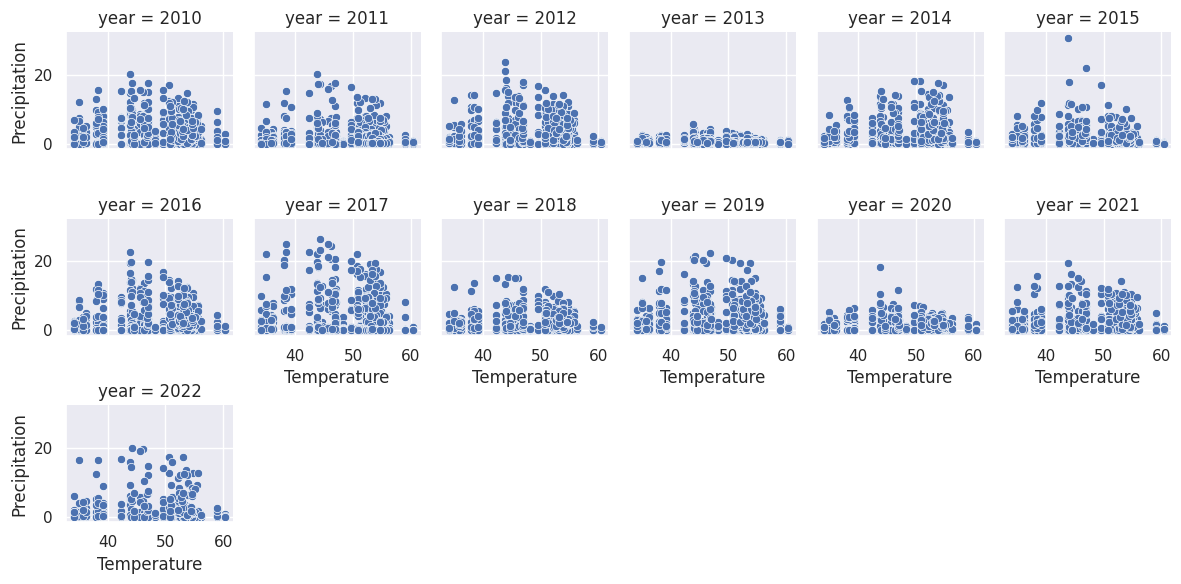

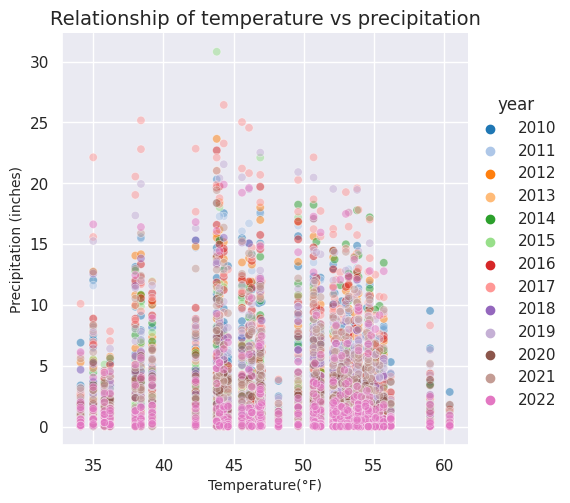

In [ ]:
import seaborn as sns
sns.set_theme()
sns.color_palette("tab20", 13)

# Set figure size (width, height) in inches
plt.figure(figsize = ( 8 , 8 ))

g = sns.FacetGrid(weather, col="year", col_wrap=6, height=2)
g.map(sns.scatterplot, 'Temperature', 'Precipitation')

sns.relplot(data=weather, x='Temperature', y='Precipitation', hue = 'year', palette ='tab20', alpha=0.5)

# Add a title
plt.title("Relationship of temperature vs precipitation", size = 14)

# Set label for x-axis
plt.xlabel( "Temperature(°F)" , size = 10 )

# Set label for y-axis
plt.ylabel( "Precipitation (inches)" , size = 10 )

plt.show()

##Observing clusters in the data

In [ ]:
# generate the yearly average temp and precipitation for the counties
weather_avg_yr = weather.groupby(['county', 'year']).mean().reset_index()
weather_avg_yr.head()

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,county,year,Temperature,rank_x,anomaly_(1901-2000_base_period)_x,1901-2000_mean_x,Precipitation,rank_y,anomaly_(1901-2000_base_period)_y,1901-2000_mean_y,temp_norm,precip_norm,month
0,0,2010,53.9,126.0,4.4,49.5,1.930833,65.333333,0.369167,1.5625,0.678507,1.220842,6.5
1,0,2011,53.9,126.0,4.4,49.5,1.210833,58.583333,-0.350833,1.5625,0.678507,0.864082,6.5
2,0,2012,53.9,126.0,4.4,49.5,1.731667,66.166667,0.169167,1.5625,0.678507,1.082987,6.5
3,0,2013,53.9,126.0,4.4,49.5,0.423333,32.666667,-1.139167,1.5625,0.678507,0.458000,6.5
4,0,2014,53.9,126.0,4.4,49.5,1.656667,68.666667,0.094167,1.5625,0.678507,0.938679,6.5


## Possible categories to observe clusters
Plotting the data in the above dataframe can help us observe categories that could be used to cluster the data into wildfire or not wildfire potential. The below graph displays scatter plots for different variables in the data frame. The diagonal plots are layered kernel density estimate (KDE), which can be used to show the distribution of the variables.

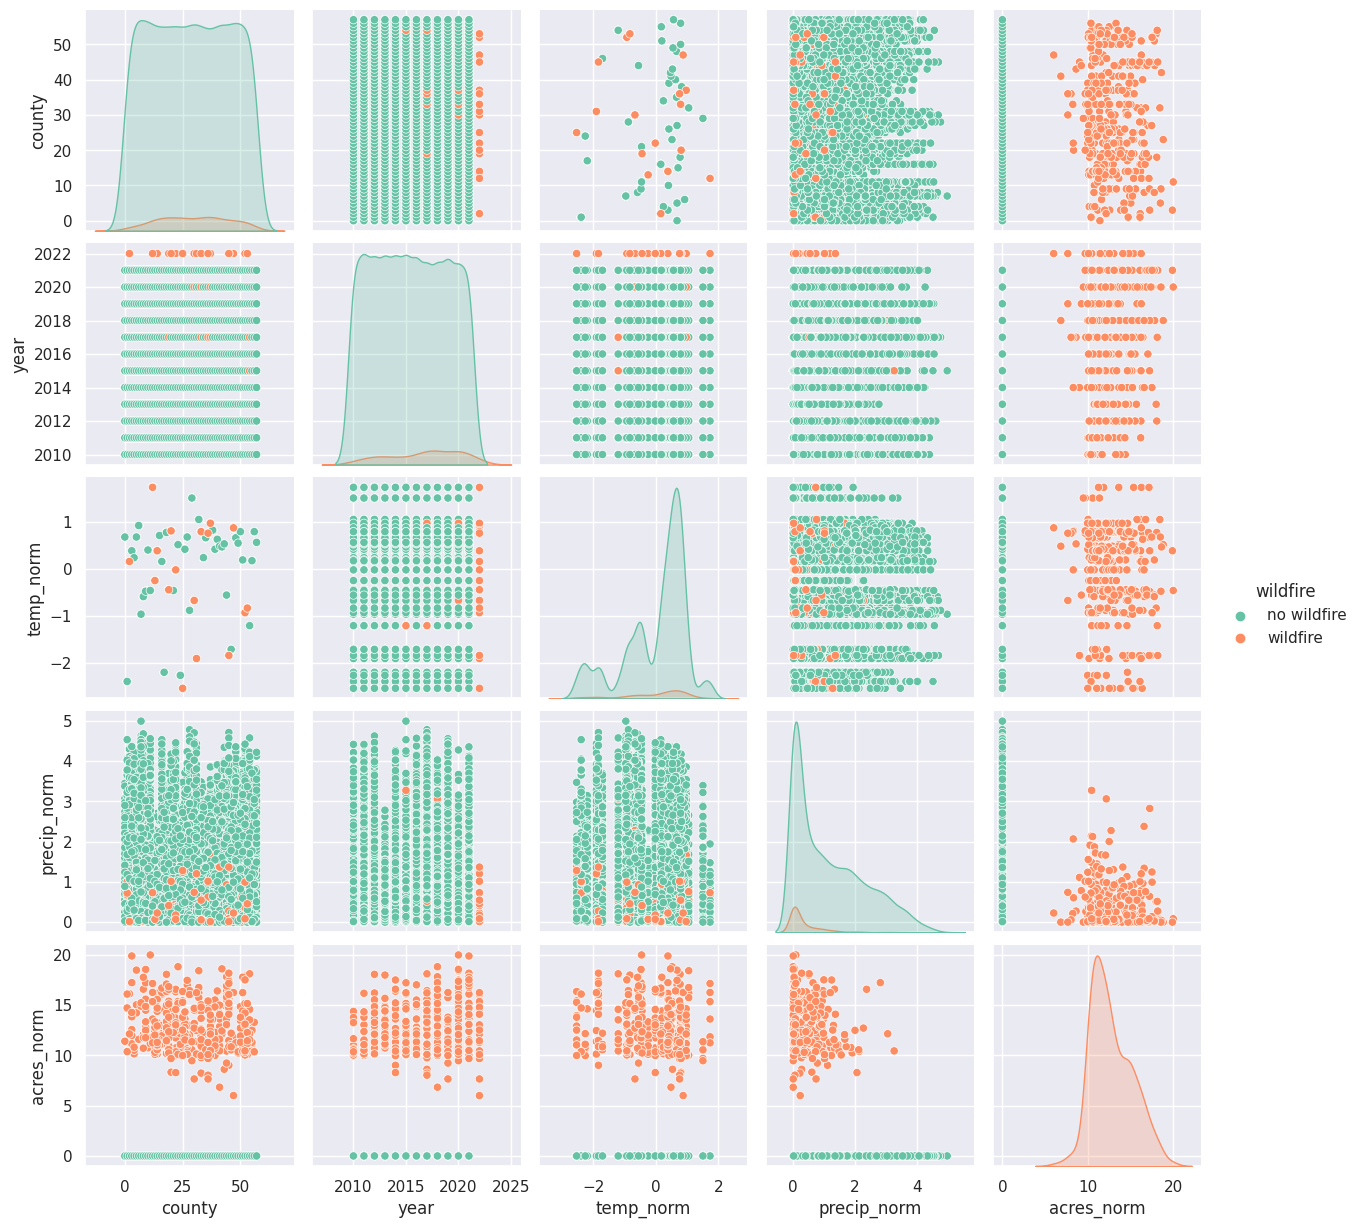

In [ ]:
sns.pairplot(df5 , hue="wildfire", palette="Set2", diag_kind="kde", height=2.5,)
plt.show()

We observe that the temp and precip variables have a very similar distribution of points and overlap. However, this does not mean that clustering can not be performed. Additional dimensionally reduction, especially when three or more variables are plotted, is the next approach before clustering.

#Clustering

##Kmeans


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


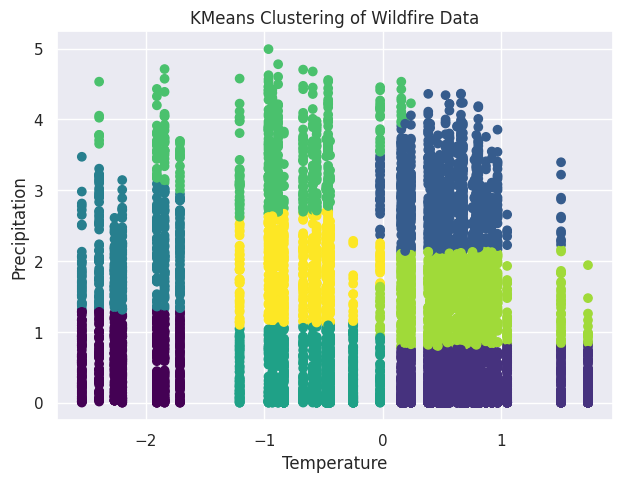

In [ ]:
# Selected Features temp_norm and precip_norm
data = df5[['temp_norm', 'precip_norm']]

n_clusters = 8

# Fit K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
kmeans_labels = kmeans.fit_predict(data)

# Add K-Means cluster labels to DataFrame
data["KMeans_Cluster"] = kmeans_labels

plt.scatter(data['temp_norm'], data['precip_norm'], c=data['KMeans_Cluster'], cmap='viridis')
plt.xlabel('Temperature')
plt.ylabel('Precipitation')
plt.title('KMeans Clustering of Wildfire Data')
plt.show()

K-Means clustering is a popular unsupervised machine learning technique used to group data points into clusters based on their similarity. When applied to wildfire data with attributes like temperature and precipitation, K-Means can provide valuable insights into the distribution of wildfires with respect to these attributes.

 Each vertical line segment represents a cluster or group of data points. The height of the line segment on the y-axis indicates the precipitation level, while the x-coordinate represents the temperature level. These line segments are positioned to show the centroid or average temperature and precipitation values for each cluster.
 The space between vertical line segments indicates the separation between clusters. Clusters with similar temperature and precipitation attributes are grouped together, while clusters with different attributes are separated.

##GMM


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


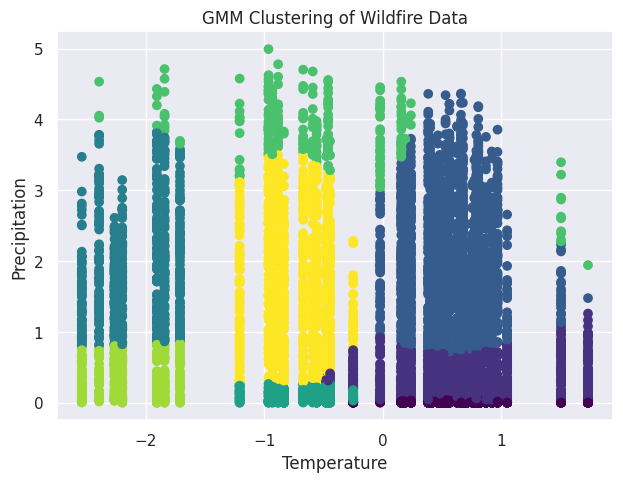

In [ ]:
#GMM
# Selected Features temp_norm and precip_norm
data = df5[['temp_norm', 'precip_norm']]

# Number of clusters
n_components = 8

# Create a Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_components)
gmm.fit(data)

# Predict cluster assignments for each data point
cluster_labels = gmm.predict(data)

# Add the cluster labels to your original DataFrame
data['GMM_Cluster'] = cluster_labels

plt.scatter(data['temp_norm'], data['precip_norm'], c=data['GMM_Cluster'], cmap='viridis')
plt.xlabel('Temperature')
plt.ylabel('Precipitation')
plt.title('GMM Clustering of Wildfire Data')
plt.show()

If you observe both Kmeans and GMM cluster graphs look similar. K-means and Gaussian Mixture Model (GMM) clusters look similar because both algorithms are deterministic in nature and both the models were tested using the same dataset and hyper parameter

##Fractal Clustering

In [ ]:
df_fractal = df5.copy()
df_fractal['wildfire_color'] = df_fractal['wildfire'].map({'wildfire': 'red', 'no wildfire': 'green'})
df_fractal

,county,year,temp_norm,precip_norm,wildfire,acres_norm,county_str,wildfire_color
0,0,2010,0.678507,2.673556,no wildfire,0.000000,Alameda County,green
1,1,2010,-2.393692,3.025029,no wildfire,0.000000,Alpine County,green
2,2,2010,0.158346,3.106013,no wildfire,0.000000,Amador County,green
3,3,2010,0.385917,3.806324,no wildfire,0.000000,Butte County,green
4,4,2010,0.239621,2.948601,no wildfire,0.000000,Calaveras County,green
...,...,...,...,...,...,...,...,...
8367,25,2022,-2.539987,1.280956,wildfire,12.512740,Mono County,red
8368,31,2022,-1.906041,1.201634,wildfire,16.228612,Plumas County,red
8369,33,2022,0.792292,0.545968,wildfire,14.788922,Sacramento County,red
8370,36,2022,0.759782,1.014355,wildfire,10.076816,San Diego County,red


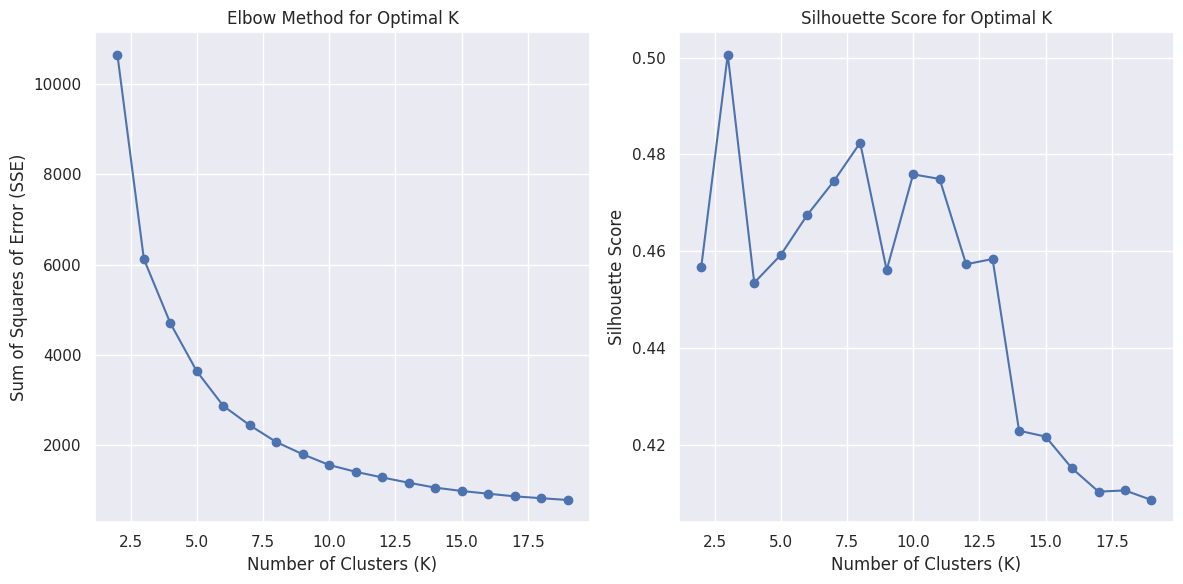

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Extract the Temp, precipitation
X = df_fractal.iloc[:,[2,3]]

# Initialize lists to store SSE and Silhouette scores
sse = []
silhouette_scores = []

# Try different values of K
K_range = range(2, 20)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)

    # Calculate SSE
    sse.append(kmeans.inertia_)

    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot SSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squares of Error (SSE)')
plt.title('Elbow Method for Optimal K')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')

plt.tight_layout()
plt.show()

The Silhouette score for our clusters appears to be 8, as there is a significant drop from 8 to 9. Additionally, in the Elbow method, the value seems to level off after k = 8, indicating a plateau.


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


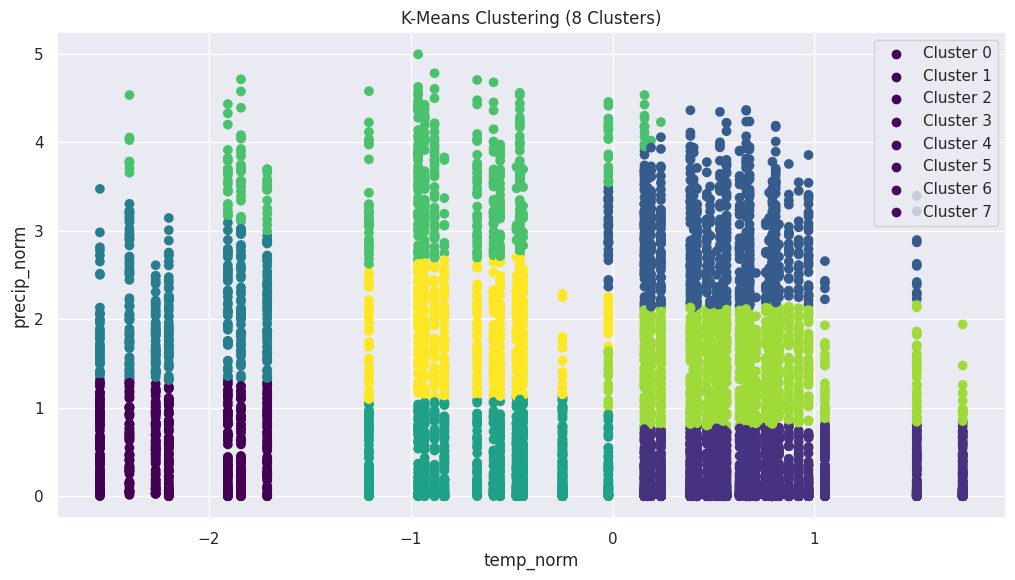

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


# Extract the features temp, precip and acers
X = df5.iloc[:,[2,3]]

n_clusters = 8

# Fit K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

df5["KMeans_6_Cluster"] = kmeans_labels

# Create a scatter plot for K-Means
plt.figure(figsize=(24, 6))
plt.subplot(1, 2, 1)
plt.scatter(X["temp_norm"], X["precip_norm"], c=kmeans_labels, cmap='viridis')
plt.xlabel('temp_norm')
plt.ylabel('precip_norm')
plt.title('K-Means Clustering ({} Clusters)'.format(n_clusters))
cmap = plt.get_cmap('viridis')
# Add color labels for K-Means clusters
for i in range(n_clusters):
    plt.scatter([], [], label='Cluster {}'.format(i), color=cmap(i))

plt.legend()


plt.show()

In [ ]:
kmeans_cluster_avg = df5.groupby('KMeans_6_Cluster').agg({
    'temp_norm': 'mean',
    'precip_norm': 'mean',
    'wildfire': 'count'
}).reset_index()

print(kmeans_cluster_avg)

   KMeans_6_Cluster  temp_norm  precip_norm  wildfire
0                 0  -2.157304     0.557130       542
1                 1   0.673432     0.177556      3030
2                 2   0.530748     2.870243       933
3                 3  -2.114736     2.055115       397
4                 4  -0.585391     0.352584       985
5                 5  -0.875532     3.496812       492
6                 6   0.614629     1.415691      1409
7                 7  -0.667013     1.857375       584


The temp norm closer to 0 and lower the precipitation norm more wildfire prone.

In [ ]:
filtered_clusters = kmeans_cluster_avg[
    (kmeans_cluster_avg['temp_norm'] > 0) &
    (kmeans_cluster_avg['precip_norm'] < 3)
]
print(filtered_clusters)

   KMeans_6_Cluster  temp_norm  precip_norm  wildfire
1                 1   0.673432     0.177556      3030
2                 2   0.530748     2.870243       933
6                 6   0.614629     1.415691      1409


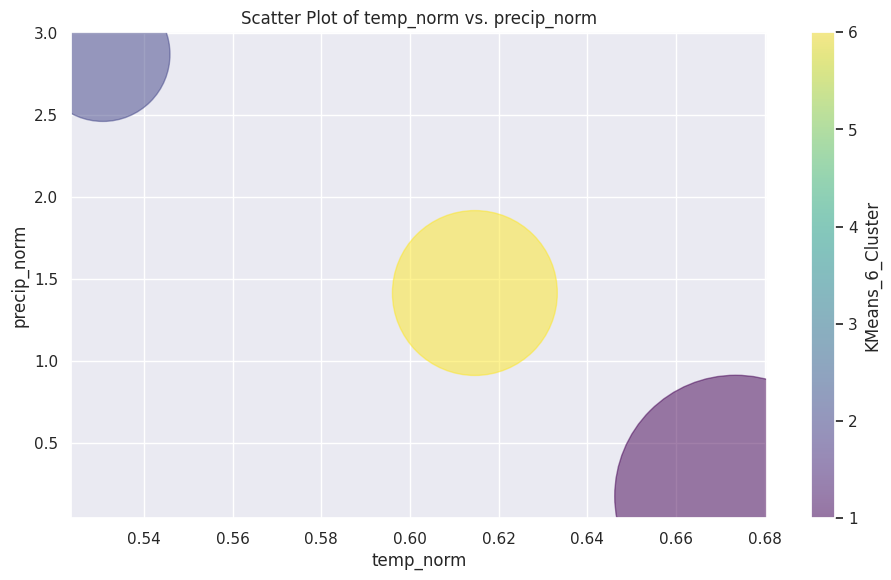

In [ ]:
data = filtered_clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['temp_norm'], data['precip_norm'], c=data['KMeans_6_Cluster'], cmap='viridis', s=data['wildfire']*10, alpha=0.5)
plt.colorbar(label='KMeans_6_Cluster')
plt.title('Scatter Plot of temp_norm vs. precip_norm')
plt.xlabel('temp_norm')
plt.ylabel('precip_norm')
plt.show()

After applying the filtering criteria, we have narrowed down the clusters to
2,3 and 7.

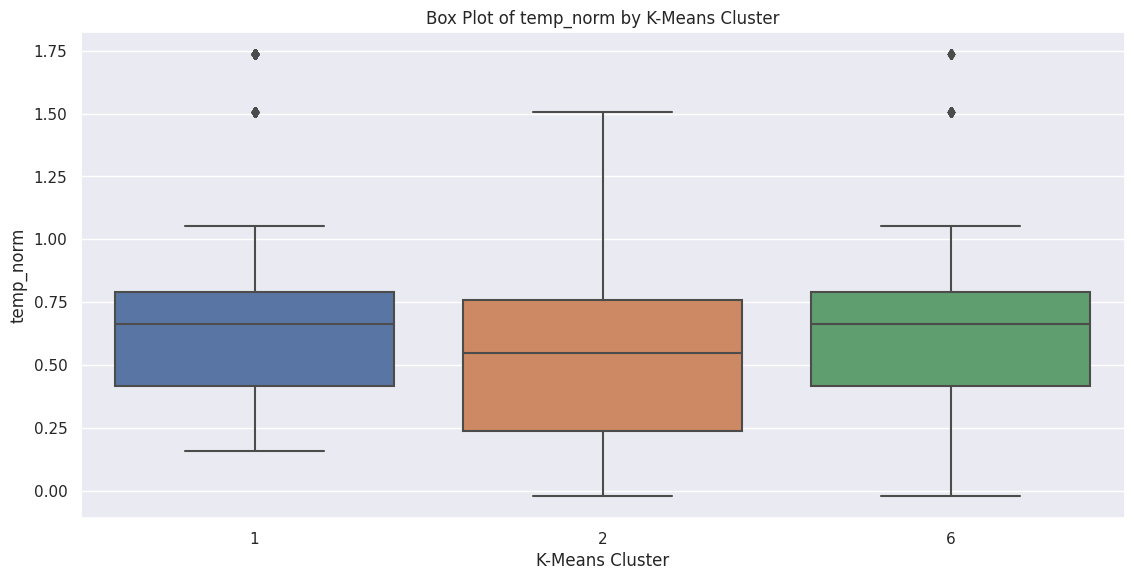

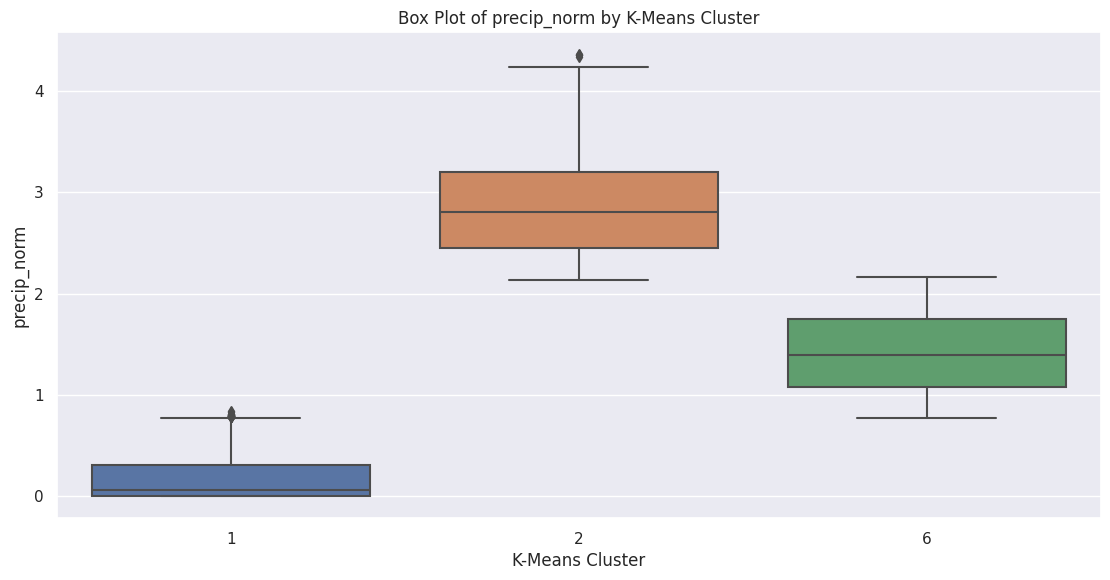

In [ ]:
clusters_to_keep = [1,2,6]

# Filter the data based on the 'KMeans_6_Cluster' column
filtered_cluster_data = df5[df5['KMeans_6_Cluster'].isin(clusters_to_keep)]

# Print the filtered data
plt.figure(figsize=(12, 6))
sns.boxplot(x='KMeans_6_Cluster', y='temp_norm', data=filtered_cluster_data)
plt.title('Box Plot of temp_norm by K-Means Cluster')
plt.xlabel('K-Means Cluster')
plt.ylabel('temp_norm')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='KMeans_6_Cluster', y='precip_norm', data=filtered_cluster_data)
plt.title('Box Plot of precip_norm by K-Means Cluster')
plt.xlabel('K-Means Cluster')
plt.ylabel('precip_norm')
plt.show()

Among the filtered clusters, clusters 2 and 6 appear to perform well in terms of both near 0 temp norm and near 1 precipitation norm.

we are further refining our data by considering only acres > 10 acres

In [ ]:
smaller_filterd_data = filtered_cluster_data[filtered_cluster_data['acres_norm'] >= 10]

In this section, we are once again conducting the Elbow and Silhouette methods to determine the optimal number of clusters.

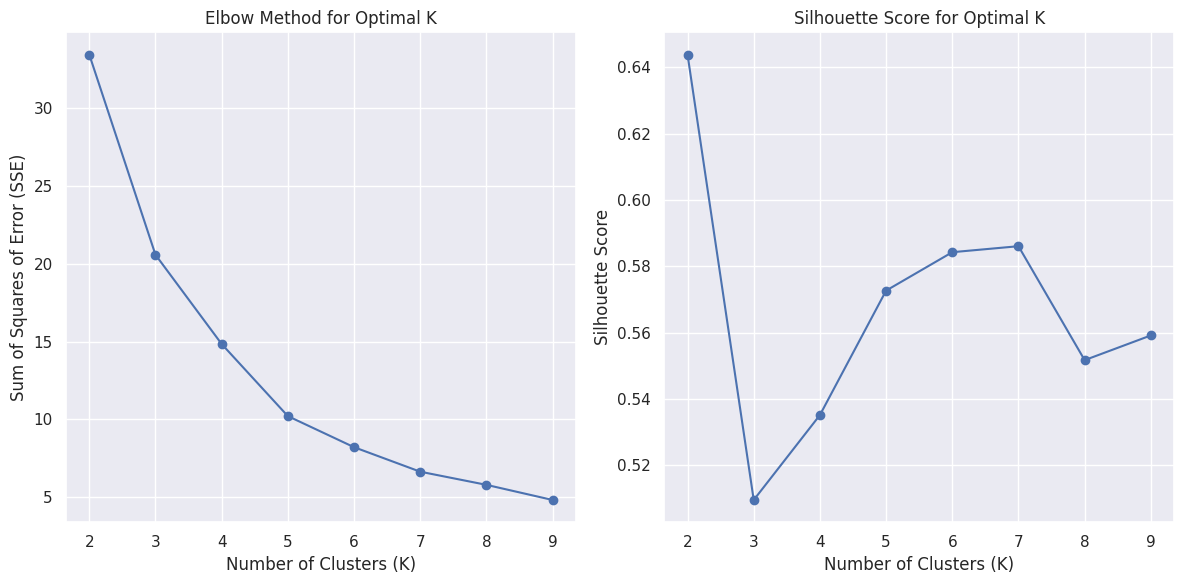

In [ ]:
X = smaller_filterd_data[["temp_norm", "precip_norm"]]

# Initialize lists to store SSE and Silhouette scores
sse = []
silhouette_scores = []

# Try different values of K
K_range = range(2,10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)

    # Calculate SSE
    sse.append(kmeans.inertia_)

    # Calculate Silhouette
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot SSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squares of Error (SSE)')
plt.title('Elbow Method for Optimal K')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')

plt.tight_layout()
plt.show()

From the above graphs 7 seems like a good score to select


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


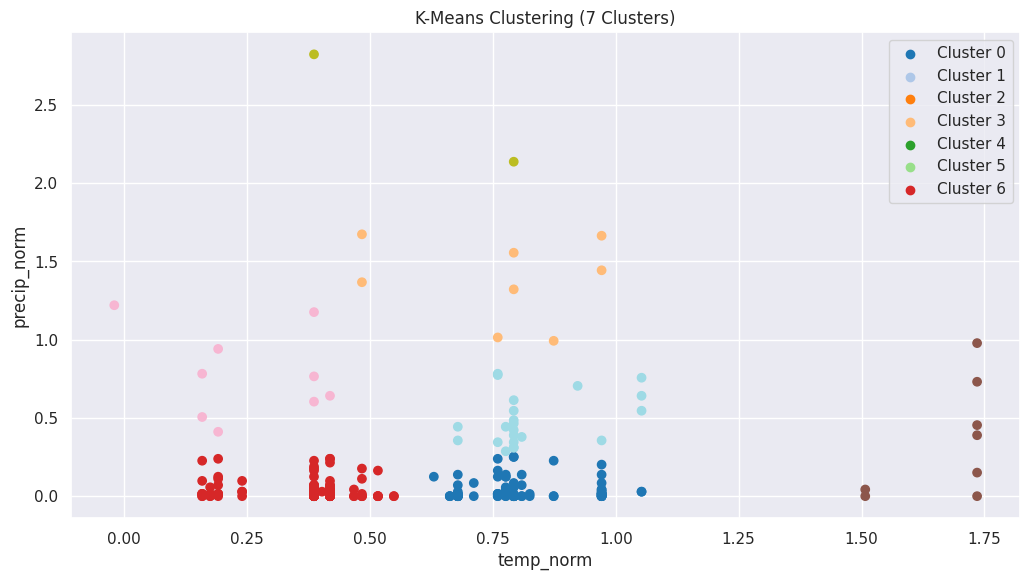

In [ ]:
X = smaller_filterd_data[["temp_norm", "precip_norm"]]

n_clusters = 7

# Fit K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# Add K-Means cluster labels to DataFrame
smaller_filterd_data.loc[:, "KMeans_4_Cluster"] = kmeans_labels

# Define a colormap for clusters
cmap = plt.get_cmap('tab20')

# Create a scatter plot for K-Means
plt.figure(figsize=(24, 6))
plt.subplot(1, 2, 1)
plt.scatter(X["temp_norm"], X["precip_norm"], c=kmeans_labels, cmap=cmap)
plt.xlabel('temp_norm')
plt.ylabel('precip_norm')
plt.title('K-Means Clustering ({} Clusters)'.format(n_clusters))

# Add color labels for K-Means clusters
for i in range(n_clusters):
    plt.scatter([], [], label='Cluster {}'.format(i), color=cmap(i))

plt.legend()


In [ ]:
kmeans_cluster_avg = smaller_filterd_data.groupby('KMeans_4_Cluster').agg({
    'temp_norm': 'mean',
    'precip_norm': 'mean',
    'wildfire': 'count'
}).reset_index()

print(kmeans_cluster_avg)

   KMeans_4_Cluster  temp_norm  precip_norm  wildfire
0                 0   0.808182     0.038692        89
1                 1   0.765878     1.379236         8
2                 2   0.364942     0.046158        93
3                 3   1.678190     0.343291         8
4                 4   0.250458     0.783182         9
5                 5   0.589104     2.480626         2
6                 6   0.826280     0.486475        22


**Conclusion**

Based on the above analysis we can conclude that cluster 0 is the 'Golden Cluster' since it has the most number of wildfires. We can utilize this information in real estate to identify the regions that are more prone to wildfires, this helps us to make an informed decision and assess the risks of properties realtors would like to invest in.

#Latent Variables and Manifolds


## Exploring Latent Variables in Predicting Wildfires

The purpose of this investigation was to delve deeper into understanding the relationship between specific latent variables, which are constructs that are not directly observed but are inferred from other observed variables, and their potential to predict wildfires. Specifically, the latent variables of interest were 'FDI', 'Weather condition', and 'Fuel Moisture'. Different regression models were utilized in an attempt to understand which predictors best describe the dependent variable 'wildfire'.

Adding **manifest variables** like PDSI, PMDI, PHDI and Palmer Z-index. The code to scrape from this is in the shared folder [Data](https://drive.google.com/drive/folders/1WsnYMr8ZTZB01e54GwqX6q9D5OMspnFV?usp=sharing) folder

In [ ]:
#https://drive.google.com/file/d/1zK3dT7xV9jNnzPXxwBRQH4Rl5ctXxAHd/view?usp=drive_link
fileDownloaded = drive.CreateFile({'id':'1zK3dT7xV9jNnzPXxwBRQH4Rl5ctXxAHd'})
fileDownloaded.GetContentFile('PDSI.csv')
pdsi = pd.read_csv('PDSI.csv')
pdsi = pdsi.rename(columns={'Value': 'PDSI'})
pdsi = pdsi[['Name', 'State', 'PDSI', 'date']]
pdsi.head()

,Name,State,PDSI,date
0,Alameda County,California,0.44,201001
1,Alpine County,California,-0.47,201001
2,Amador County,California,0.43,201001
3,Butte County,California,-0.02,201001
4,Calaveras County,California,-0.44,201001


In [ ]:
#https://drive.google.com/file/d/17q1-HdqCJdsTjANAWwDxv9rF6XrlughF/view?usp=drive_link
fileDownloaded = drive.CreateFile({'id':'17q1-HdqCJdsTjANAWwDxv9rF6XrlughF'})
fileDownloaded.GetContentFile('PHDI.csv')
phdi = pd.read_csv('PHDI.csv')
phdi = phdi.rename(columns={'Value': 'PHDI'})
phdi = phdi[['Name', 'State', 'PHDI', 'date']]
phdi.head()

,Name,State,PHDI,date
0,Alameda County,California,0.95,201001
1,Alpine County,California,-0.47,201001
2,Amador County,California,-0.88,201001
3,Butte County,California,-0.94,201001
4,Calaveras County,California,-0.96,201001


In [ ]:
#https://drive.google.com/file/d/1-jKgZM-QA8aNnIS11JnEkbGkfz7JvjGv/view?usp=drive_link
fileDownloaded = drive.CreateFile({'id':'1-jKgZM-QA8aNnIS11JnEkbGkfz7JvjGv'})
fileDownloaded.GetContentFile('PDMI.csv')
pdmi = pd.read_csv('PDMI.csv')
pdmi = pdmi.rename(columns={'Value': 'PDMI'})
pdmi = pdmi[['Name', 'State', 'PDMI', 'date']]
pdmi.columns

Index(['Name', 'State', 'PDMI', 'date'], dtype='object')

In [ ]:
#https://drive.google.com/file/d/1QE7VsCWCHoFIlndPYJ7EcMZnQ_RUO_0K/view?usp=drive_link
fileDownloaded = drive.CreateFile({'id':'1QE7VsCWCHoFIlndPYJ7EcMZnQ_RUO_0K'})
fileDownloaded.GetContentFile('Z-Index.csv')
zind = pd.read_csv('Z-Index.csv')
zind = zind.rename(columns={'Value': 'Z-Index'})
zind = zind[['Name', 'State', 'Z-Index', 'date']]
zind.columns

Index(['Name', 'State', 'Z-Index', 'date'], dtype='object')

##Merge all these features

In [ ]:
ds_fet = pd.merge(pdsi, phdi, on = ['Name', 'State', 'date'], how="inner")
ds_fet = pd.merge(ds_fet, pdmi, on = ['Name', 'State', 'date'], how="inner")
ds_fet = pd.merge(ds_fet, zind, on = ['Name', 'State', 'date'], how="inner")
ds_fet.head()

,Name,State,PDSI,date,PHDI,PDMI,Z-Index
0,Alameda County,California,0.44,201001,0.95,0.23,1.33
1,Alpine County,California,-0.47,201001,-0.47,-0.47,0.60
2,Amador County,California,0.43,201001,-0.88,0.09,0.79
3,Butte County,California,-0.02,201001,-0.94,0.15,1.92
4,Calaveras County,California,-0.44,201001,-0.96,-0.19,0.22


In [ ]:
ds_fet['Name'] = label_encoder.fit_transform(ds_fet['Name'])
ds_fet['date'] = ds_fet['date'].astype('object')
ds_fet.head()

,Name,State,PDSI,date,PHDI,PDMI,Z-Index
0,0,California,0.44,201001,0.95,0.23,1.33
1,1,California,-0.47,201001,-0.47,-0.47,0.60
2,2,California,0.43,201001,-0.88,0.09,0.79
3,3,California,-0.02,201001,-0.94,0.15,1.92
4,4,California,-0.44,201001,-0.96,-0.19,0.22


In [ ]:
df4.columns

Index(['id_x', 'county', 'state_x', 'Temperature', 'rank_x', 'date',
       'Precipitation', 'county_str', 'year', 'temp_norm', 'precip_norm',
       'month', 'acres', 'wildfire', 'acres_norm'],
      dtype='object')

In [ ]:
df5 = df4[['county', 'state_x', 'Temperature','date', 'year', 'month', 'Precipitation', 'temp_norm', 'precip_norm', 'acres', 'wildfire', 'county_str']]
df5['date_str'] = df5['date'].dt.strftime('%Y%m')
df5.head(1)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,county,state_x,Temperature,date,year,month,Precipitation,temp_norm,precip_norm,acres,wildfire,county_str,date_str
0,0,California,53.9,2010-01-01,2010,1,5.38,0.678507,2.673556,0.0,no wildfire,Alameda County,201001


In [ ]:
ds_fet.head(1)

,Name,State,PDSI,date,PHDI,PDMI,Z-Index
0,0,California,0.44,201001,0.95,0.23,1.33


In [ ]:
# ds_fet['date'] = ds_fet['date'].strip()
ds_fet['date'] = ds_fet['date'].astype(str).str.strip()
df5['date_str'] = df5['date_str'].astype(str).str.strip()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
merged_df = pd.merge(ds_fet, df5, left_on=['Name', 'State', 'date'], right_on=['county', 'state_x', 'date_str'], how='inner')
merged_df['wildfire'] = label_encoder.fit_transform(merged_df['wildfire'])
merged_df['date_x'] = merged_df['date_x'].astype(int)
merged_df = merged_df.rename(columns={'date_x': 'date'})
merged_df = merged_df.rename(columns={'Z-Index': 'Palmer_Z-Index', 'state_x':'state'})

In [ ]:
merged_df.columns

Index(['Name', 'State', 'PDSI', 'date', 'PHDI', 'PDMI', 'Palmer_Z-Index',
       'county', 'state', 'Temperature', 'date_y', 'year', 'month',
       'Precipitation', 'temp_norm', 'precip_norm', 'acres', 'wildfire',
       'county_str', 'date_str'],
      dtype='object')

##Feature Importance

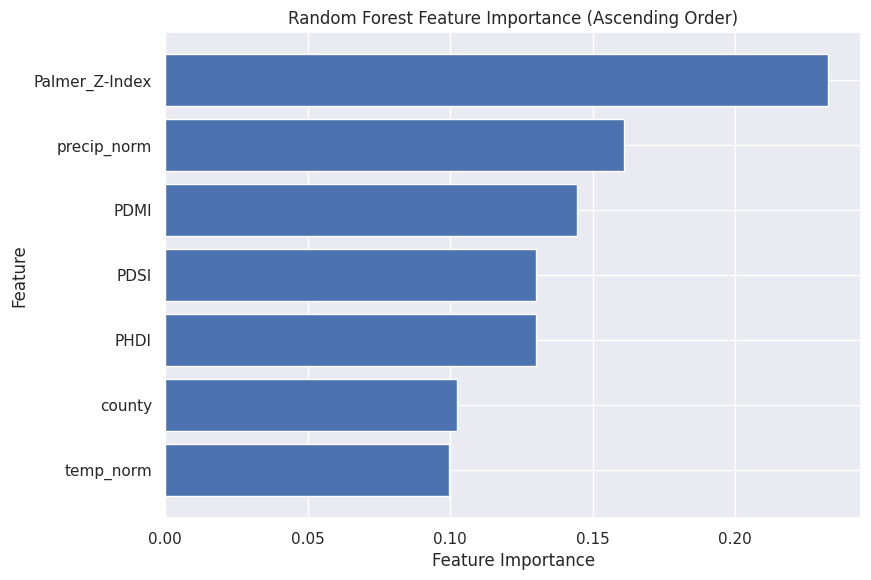

In [ ]:
# Random Forest Feature Importance

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Extract the features and target variable
X, y = merged_df[['temp_norm', 'precip_norm', 'PDSI', 'PHDI', 'PDMI', 'Palmer_Z-Index', 'county']], merged_df[['wildfire']]

# Create and train a Random Forest Classifier
#rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf = DecisionTreeClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in ascending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a bar chart to visualize feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance (Ascending Order)')
plt.show()

## Latent feature

- FDI: A composite measure that integrates weather-related variables (temperature, precipitation, drought indices like Palmer_Z-Index) to estimate the potential fire risk.
  - Manifest variables: temperature, precipitation and Palmer_Z-Index

- Fuel Moisture: The moisture content of vegetation and fuel sources in a given area. It affects the ease with which fires can ignite and spread.
  - Manifest variables: Palmer_Z-Index

In [ ]:
# Calculate Fire Danger Index (simplified example)
merged_df['FDI'] = 0.1 * merged_df['temp_norm'] + 0.05 * (1 - merged_df['precip_norm']) + 0.02 * merged_df['Palmer_Z-Index']

# Calculate Fuel Moisture Content (simplified example)
# In practice, this would involve more complex methods and possibly field data.
merged_df['fuel_moisture'] = 100 - merged_df['Palmer_Z-Index']

In [ ]:
# df = merged_df.copy()
target = 'Weather condition'


weights = {
    'temp_norm': 0.03,
    'precip_norm': 0.05,
}

# Calculate the Living Experience Quality as a weighted sum of manifest variables
merged_df['Weather condition'] = (
    merged_df['temp_norm'] * weights['temp_norm'] +
    merged_df['precip_norm'] * weights['precip_norm']
)


# X, y = df[['Weather condition']], merged_df[['wildfire']]
# y = label_encoder.fit_transform(merged_df['wildfire'])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# muller_loop(X_train, X_test, y_train, y_test)

#Classification

In [ ]:
merged_df.columns

Index(['Name', 'State', 'PDSI', 'date', 'PHDI', 'PDMI', 'Palmer_Z-Index',
       'county', 'state', 'Temperature', 'date_y', 'year', 'month',
       'Precipitation', 'temp_norm', 'precip_norm', 'acres', 'wildfire',
       'county_str', 'date_str', 'FDI', 'fuel_moisture', 'Weather condition'],
      dtype='object')

##Nearest Neighbors

In [ ]:
X, y = merged_df[['temp_norm', 'precip_norm', 'PDSI', 'PHDI', 'PDMI', 'Palmer_Z-Index', 'county', 'FDI',
       'fuel_moisture', 'Weather condition']], merged_df[['wildfire']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=42)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
score = 100.0 * knn_classifier.score(X_test, y_test)
print(f'Accuracy: {score}')
print('confusion matrix \n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 95.34328358208955
confusion matrix 
 [[1597    0]
 [  78    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1597
           1       1.00      0.00      0.00        78

    accuracy                           0.95      1675
   macro avg       0.98      0.50      0.49      1675
weighted avg       0.96      0.95      0.93      1675



##Random Forest

In [ ]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

rf_model = rf_classification.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
score = 100.0 * knn_classifier.score(X_test, y_test)
print(f'Accuracy: {score}')
print('confusion matrix \n', confusion_matrix(y_test, y_pred))
train_report = classification_report(y_train, rf_model.predict(X_train), zero_division=1)

print(train_report)

Accuracy: 95.34328358208955
confusion matrix 
 [[1597    0]
 [  78    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6364
           1       1.00      0.81      0.90       333

    accuracy                           0.99      6697
   macro avg       1.00      0.91      0.95      6697
weighted avg       0.99      0.99      0.99      6697



##Muller Loop

In [ ]:
names = [
    "Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", #"GridSearchCV",
         "Neural Net", "AdaBoost",
         "Naive Bayes"
         ]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [ ]:
def muller_classification(X_train, X_test, y_train, y_test):
  max_score = 0.0
  max_class = ''
  # iterate over classifiers
  metrics_df = pd.DataFrame({
      'Classifier': [],
      'MSE' : [],
      'MAE': [],
      'RSquared': [],
      'Test Accuracy': [],
      'Recall':[],
      'Precision': []
      })
  global m_pred
  m_pred = {}

  for name, clf in zip(names, classifiers):
    print(name)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = 100.0 * clf.score(X_test, y_test)
    mean_absolute_error = np.round(metrics.mean_absolute_error(y_test, y_pred), 2)
    mean_squared_error = np.round(metrics.mean_squared_error(y_test, y_pred), 2)
    r_squared = np.round(metrics.r2_score(y_test, y_pred), 2)
    test_acc = metrics.accuracy_score(y_test, y_pred) * 100
    recall = metrics.recall_score(y_test, y_pred, average = 'weighted')
    precision = metrics.precision_score(y_test, y_pred, average = 'weighted', zero_division=1)
    new_row = pd.DataFrame({
    'Classifier': name,
    'MSE' : mean_absolute_error,
    'MAE': mean_squared_error,
    'RSquared': r_squared,
    'Test Accuracy': test_acc,
    'Recall': recall,
    'Precision': precision}, index=[0])

    m_pred[name] = {
        'y_pred' : y_pred,
        'y_test': y_test
    }


    metrics_df = pd.concat([new_row,metrics_df.loc[:]]).reset_index(drop=True)

    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

  print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

  return metrics_df

In [ ]:
# metrics_df = muller_classification(X_train, X_test, y_train, y_test)
# metrics_df.head(10)
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
metrics_df = muller_classification(X_train, X_test, y_train_encoded, y_test_encoded)
metrics_df.head(10)

Nearest Neighbors
Classifier = Nearest Neighbors, Score (test, accuracy) = 94.99,
Linear SVM
Classifier = Linear SVM, Score (test, accuracy) = 95.34,
RBF SVM
Classifier = RBF SVM, Score (test, accuracy) = 95.34,
Decision Tree
Classifier = Decision Tree, Score (test, accuracy) = 95.28,
Random Forest
Classifier = Random Forest, Score (test, accuracy) = 95.34,
Neural Net
Classifier = Neural Net, Score (test, accuracy) = 95.34,
AdaBoost
Classifier = AdaBoost, Score (test, accuracy) = 95.34,
Naive Bayes
Classifier = Naive Bayes, Score (test, accuracy) = 95.28,
Best --> Classifier = Linear SVM, Score (test, accuracy) = 95.34


,Classifier,MSE,MAE,RSquared,Test Accuracy,Recall,Precision
0,Naive Bayes,0.05,0.05,-0.06,95.283582,0.952836,0.909008
1,AdaBoost,0.05,0.05,-0.05,95.343284,0.953433,0.955601
2,Neural Net,0.05,0.05,-0.05,95.343284,0.953433,0.955601
3,Random Forest,0.05,0.05,-0.05,95.343284,0.953433,0.955601
4,Decision Tree,0.05,0.05,-0.06,95.283582,0.952836,0.909008
5,RBF SVM,0.05,0.05,-0.05,95.343284,0.953433,0.932835
6,Linear SVM,0.05,0.05,-0.05,95.343284,0.953433,0.955601
7,Nearest Neighbors,0.05,0.05,-0.13,94.985075,0.949851,0.922076


#Discussion on Amalgamation of the Datasets Muller Loops

##DS1 with Muller loop

In [ ]:
from sklearn.preprocessing import StandardScaler

X, y = fires_total_yr[['year', 'month', 'county']], fires_total_yr[['wildfire']]
X = StandardScaler().fit_transform(X)

y = y.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# TODO (Apply): All cross-validation

max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    print('confusion matrix \n', confusion_matrix(y_test, y_pred))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name


# Print the best classifier and its score
if clf_best is not None:
    print(f"The best classifier is {max_class} with a test accuracy of {max_score:.2f}%")
else:
    print("No classifier found.")

Classifier = Nearest Neighbors, Score (test, accuracy) = 94.51, Training time = 0.25 seconds
confusion matrix 
 [[1582    8]
 [  84    1]]
Classifier = Linear SVM, Score (test, accuracy) = 94.93, Training time = 0.18 seconds
confusion matrix 
 [[1590    0]
 [  85    0]]
Classifier = RBF SVM, Score (test, accuracy) = 94.93, Training time = 1.12 seconds
confusion matrix 
 [[1590    0]
 [  85    0]]
Classifier = Decision Tree, Score (test, accuracy) = 95.16, Training time = 0.01 seconds
confusion matrix 
 [[1590    0]
 [  81    4]]
Classifier = Random Forest, Score (test, accuracy) = 95.16, Training time = 0.04 seconds
confusion matrix 
 [[1590    0]
 [  81    4]]
Classifier = Neural Net, Score (test, accuracy) = 94.93, Training time = 2.29 seconds
confusion matrix 
 [[1590    0]
 [  85    0]]
Classifier = AdaBoost, Score (test, accuracy) = 95.16, Training time = 0.61 seconds
confusion matrix 
 [[1590    0]
 [  81    4]]
Classifier = Naive Bayes, Score (test, accuracy) = 94.93, Training t

##DS1 + DS2

In [ ]:
#prep
ds2_temp = temp
ds2_temp['date'] = pd.to_datetime(ds2_temp['date'], format='%Y%m')
ds2_temp['year'] = ds2_temp['date'].dt.year
ds2_temp['month'] = ds2_temp['date'].dt.month
ds2_temp.rename(columns = {'name': 'county'}, inplace = True)

# Fit and transform the data
ds2_temp['county'] = label_encoder.fit_transform(ds2_temp['county'])

ds2 = pd.merge(left=ds2_temp, right=fires_total_yr, on=['county', 'year', 'month'], how='inner')
ds2.rename(columns = {'value' : 'Temperature'}, inplace = True)

X, y = ds2[['Temperature', 'county']], ds2[['wildfire']]
X = StandardScaler().fit_transform(X)

y = y.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# TODO (Apply): All cross-validation

max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    print('confusion matrix \n', confusion_matrix(y_test, y_pred))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name


# Print the best classifier and its score
if clf_best is not None:
    print(f"The best classifier is {max_class} with a test accuracy of {max_score:.2f}%")
else:
    print("No classifier found.")

Classifier = Nearest Neighbors, Score (test, accuracy) = 94.21, Training time = 0.21 seconds
confusion matrix 
 [[1576   21]
 [  76    2]]
Classifier = Linear SVM, Score (test, accuracy) = 95.34, Training time = 0.14 seconds
confusion matrix 
 [[1597    0]
 [  78    0]]
Classifier = RBF SVM, Score (test, accuracy) = 95.34, Training time = 0.29 seconds
confusion matrix 
 [[1597    0]
 [  78    0]]
Classifier = Decision Tree, Score (test, accuracy) = 95.34, Training time = 0.02 seconds
confusion matrix 
 [[1597    0]
 [  78    0]]
Classifier = Random Forest, Score (test, accuracy) = 95.34, Training time = 0.05 seconds
confusion matrix 
 [[1597    0]
 [  78    0]]
Classifier = Neural Net, Score (test, accuracy) = 95.34, Training time = 5.73 seconds
confusion matrix 
 [[1597    0]
 [  78    0]]
Classifier = AdaBoost, Score (test, accuracy) = 95.34, Training time = 0.60 seconds
confusion matrix 
 [[1597    0]
 [  78    0]]
Classifier = Naive Bayes, Score (test, accuracy) = 95.34, Training t

##DS1 + DS2 + DS3 with muller loop

In [ ]:
X, y = df4[['temp_norm', 'precip_norm']], df5[['wildfire']]
X = StandardScaler().fit_transform(X)

y = y.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# TODO (Apply): All cross-validation

max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    print('confusion matrix \n', confusion_matrix(y_test, y_pred))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name


# Print the best classifier and its score
if clf_best is not None:
    print(f"The best classifier is {max_class} with a test accuracy of {max_score:.2f}%")
else:
    print("No classifier found.")

Classifier = Nearest Neighbors, Score (test, accuracy) = 94.81, Training time = 0.19 seconds
confusion matrix 
 [[1586   11]
 [  76    2]]
Classifier = Linear SVM, Score (test, accuracy) = 95.34, Training time = 0.15 seconds
confusion matrix 
 [[1597    0]
 [  78    0]]
Classifier = RBF SVM, Score (test, accuracy) = 95.34, Training time = 0.41 seconds
confusion matrix 
 [[1597    0]
 [  78    0]]
Classifier = Decision Tree, Score (test, accuracy) = 95.34, Training time = 0.01 seconds
confusion matrix 
 [[1597    0]
 [  78    0]]
Classifier = Random Forest, Score (test, accuracy) = 95.34, Training time = 0.06 seconds
confusion matrix 
 [[1597    0]
 [  78    0]]
Classifier = Neural Net, Score (test, accuracy) = 95.34, Training time = 2.51 seconds
confusion matrix 
 [[1597    0]
 [  78    0]]
Classifier = AdaBoost, Score (test, accuracy) = 95.34, Training time = 0.63 seconds
confusion matrix 
 [[1597    0]
 [  78    0]]
Classifier = Naive Bayes, Score (test, accuracy) = 95.34, Training t

## Merged dataset with latent and manifest variables with Muller loop

In [ ]:
X, y = merged_df[['temp_norm', 'precip_norm', 'PDSI', 'PHDI', 'PDMI', 'Palmer_Z-Index', 'county', 'FDI',
       'fuel_moisture']], merged_df[['wildfire']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=42)

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# TODO (Apply): All cross-validation

max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    print('confusion matrix \n', confusion_matrix(y_test, y_pred))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name


# Print the best classifier and its score
if clf_best is not None:
    print(f"The best classifier is {max_class} with a test accuracy of {max_score:.2f}%")
else:
    print("No classifier found.")

Classifier = Nearest Neighbors, Score (test, accuracy) = 94.99, Training time = 0.23 seconds
confusion matrix 
 [[1588    9]
 [  75    3]]
Classifier = Linear SVM, Score (test, accuracy) = 95.34, Training time = 2.19 seconds
confusion matrix 
 [[1597    0]
 [  78    0]]
Classifier = RBF SVM, Score (test, accuracy) = 95.34, Training time = 6.23 seconds
confusion matrix 
 [[1596    1]
 [  77    1]]
Classifier = Decision Tree, Score (test, accuracy) = 95.22, Training time = 0.03 seconds
confusion matrix 
 [[1595    2]
 [  78    0]]
Classifier = Random Forest, Score (test, accuracy) = 95.34, Training time = 0.06 seconds
confusion matrix 
 [[1597    0]
 [  78    0]]
Classifier = Neural Net, Score (test, accuracy) = 95.34, Training time = 3.53 seconds
confusion matrix 
 [[1597    0]
 [  78    0]]
Classifier = AdaBoost, Score (test, accuracy) = 95.28, Training time = 0.57 seconds
confusion matrix 
 [[1596    1]
 [  78    0]]
Classifier = Naive Bayes, Score (test, accuracy) = 95.34, Training t

Variables are collinear


After running the muller loop on various datasets and their amalgamations we can conclude that the final dataset with manifest and Latent variables is suitable. The best classifier we have is Linear SVM with 95.34% accuracy

#SHAP

 99%|===================| 3319/3350 [01:13<00:00]       

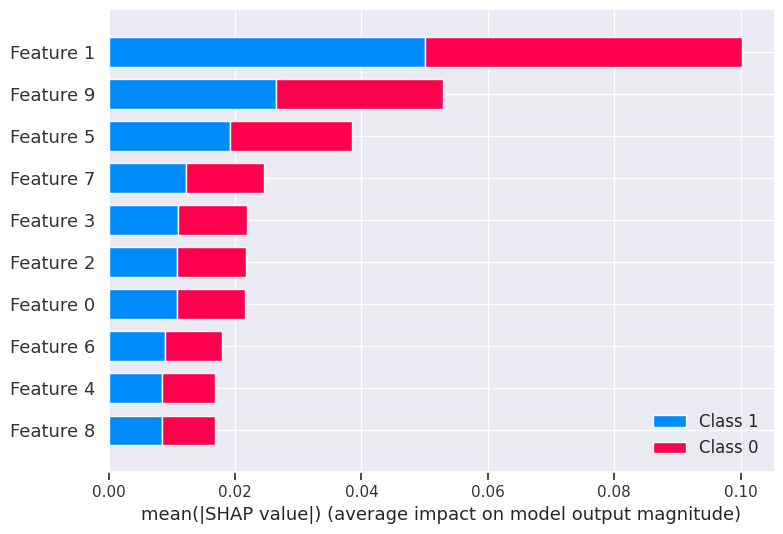

In [ ]:
from sklearn.preprocessing import StandardScaler

# Extract the features and target variable
X = merged_df[['temp_norm', 'precip_norm', 'PDSI', 'PHDI', 'PDMI', 'Palmer_Z-Index', 'county', 'FDI',
       'fuel_moisture', 'Weather condition']]
y = merged_df['wildfire']

X = StandardScaler().fit_transform(X)

y = label_encoder.fit_transform(df5['wildfire'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42)

# Create and train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Create a SHAP explainer for the trained model
explainer = shap.Explainer(rf, X_train)

# Calculate SHAP values with additivity check disabled
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Summarize feature importance using SHAP values
shap.summary_plot(shap_values, X_test, plot_type='bar')


##Upsample

In [ ]:
#Upsample
# Extract the 'Temperature' column
upsampled_temperature = df5['temp_norm']

# Define the number of synthetic data points to generate
num_synthetic_points = 100

# Generate synthetic temperature values using linear interpolation
synthetic_indices = np.random.choice(len(upsampled_temperature), num_synthetic_points)
synthetic_upsampled_temperature = np.interp(np.arange(len(upsampled_temperature)), synthetic_indices, upsampled_temperature[synthetic_indices])

# Create a new DataFrame with the synthetic temperature values
synthetic_data = pd.DataFrame({'temp_norm': synthetic_upsampled_temperature})

# Concatenate the synthetic data with the original dataset
# upsampled_temperature = pd.concat([df5, synthetic_data], ignore_index=True)

# upsampled_temperature = upsampled_temperature.replace([np.nan, -np.inf], 0)

# upsampled_temperature

##Muller loop on upsample

In [ ]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
confusion_matrix_up={}

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    print('confusion matrix \n', confusion_matrix(y_test, y_pred))
    confusion_matrix_up[name] = confusion_matrix(y_test, y_pred)
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name


# Print the best classifier and its score
if clf_best is not None:
    print(f"The best classifier is {max_class} with a test accuracy of {max_score:.2f}%")
else:
    print("No classifier found.")

Classifier = Nearest Neighbors, Score (test, accuracy) = 94.39, Training time = 0.28 seconds
confusion matrix 
 [[1577    8]
 [  86    4]]
Classifier = Linear SVM, Score (test, accuracy) = 94.63, Training time = 0.25 seconds
confusion matrix 
 [[1585    0]
 [  90    0]]
Classifier = RBF SVM, Score (test, accuracy) = 94.57, Training time = 1.34 seconds
confusion matrix 
 [[1584    1]
 [  90    0]]
Classifier = Decision Tree, Score (test, accuracy) = 94.63, Training time = 0.03 seconds
confusion matrix 
 [[1584    1]
 [  89    1]]
Classifier = Random Forest, Score (test, accuracy) = 94.63, Training time = 0.07 seconds
confusion matrix 
 [[1585    0]
 [  90    0]]
Classifier = Neural Net, Score (test, accuracy) = 94.63, Training time = 2.92 seconds
confusion matrix 
 [[1585    0]
 [  90    0]]
Classifier = AdaBoost, Score (test, accuracy) = 94.63, Training time = 0.63 seconds
confusion matrix 
 [[1585    0]
 [  90    0]]
Classifier = Naive Bayes, Score (test, accuracy) = 94.63, Training t

Variables are collinear


##Downsample

In [ ]:
#Downsample
temperatures = df4['temp_norm']

# Define the desired size for the downsampled data
desired_sample_size = 500  # Adjust this as needed

# Check if the desired sample size is greater than the current size
if desired_sample_size < len(temperatures):
    # Downsample the 'Temperature' column by taking a random sample
    downsampled_temperatures = np.random.choice(temperatures, desired_sample_size, replace=False)
else:
    # If the desired sample size is greater or equal to the current size, keep the original data
    downsampled_temperatures = temperatures

# Create a new DataFrame with the downsampled 'Temperature' values
downsampled_data = pd.DataFrame({'Temperature': downsampled_temperatures})

# Now downsampled_data contains the 'Temperature' column with the desired sample size

downsampled_data


,Temperature
0,-2.198631
1,0.239621
2,0.629742
3,0.158346
4,-1.207075
...,...
495,-0.930740
496,0.792292
497,-2.393692
498,0.190856


##Muller loop on downsampled data

In [ ]:
#Muller loop on downsampled data
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
confusion_matrix_down={}

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# TODO (Apply): All cross-validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    print('confusion matrix \n', confusion_matrix(y_test, y_pred))
    confusion_matrix_down[name] = confusion_matrix(y_test, y_pred)
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name


# Print the best classifier and its score
if clf_best is not None:
    print(f"The best classifier is {max_class} with a test accuracy of {max_score:.2f}%")
else:
    print("No classifier found.")

Classifier = Nearest Neighbors, Score (test, accuracy) = 94.27, Training time = 0.28 seconds
confusion matrix 
 [[1577   11]
 [  85    2]]
Classifier = Linear SVM, Score (test, accuracy) = 94.81, Training time = 0.22 seconds
confusion matrix 
 [[1588    0]
 [  87    0]]
Classifier = RBF SVM, Score (test, accuracy) = 94.69, Training time = 1.15 seconds
confusion matrix 
 [[1586    2]
 [  87    0]]
Classifier = Decision Tree, Score (test, accuracy) = 94.75, Training time = 0.03 seconds
confusion matrix 
 [[1587    1]
 [  87    0]]
Classifier = Random Forest, Score (test, accuracy) = 94.81, Training time = 0.06 seconds
confusion matrix 
 [[1588    0]
 [  87    0]]
Classifier = Neural Net, Score (test, accuracy) = 94.81, Training time = 5.06 seconds
confusion matrix 
 [[1588    0]
 [  87    0]]
Classifier = AdaBoost, Score (test, accuracy) = 94.69, Training time = 0.82 seconds
confusion matrix 
 [[1586    2]
 [  87    0]]
Classifier = Naive Bayes, Score (test, accuracy) = 93.97, Training t

Variables are collinear


#gini score

In [ ]:
# Train a Decision Tree Classifier
classifier = DecisionTreeClassifier()
X = merged_df[['temp_norm', 'precip_norm', 'PDSI', 'PHDI', 'PDMI', 'Palmer_Z-Index', 'county', 'FDI',
       'fuel_moisture', 'Weather condition']]
y = merged_df['wildfire']
classifier.fit(X, y)

# Access the decision tree structure
tree = classifier.tree_

# Access the Gini score for a specific node (e.g., root node, node 0)
root_gini_score = tree.impurity[0]

print("Gini score for the root node:", root_gini_score)


Gini score for the root node: 0.09336433368662955


Gini score for the root node is a measure of how well the initial data can be classified into different categories (classes) based on the feature selected for the first split in the decision tree. The specific value, 0.0934 in this case, indicates the level of impurity at the root node before any further splits are made. Lower Gini scores at the root node often indicate that the tree has found a feature and value that result in relatively pure child nodes, which is a desirable outcome in decision tree modeling.

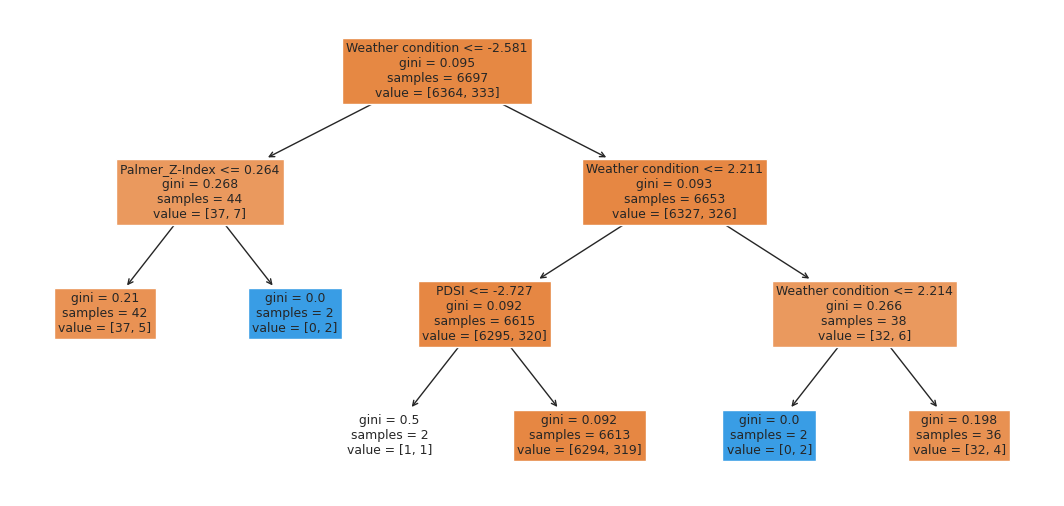

In [ ]:
# Create and fit the DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(max_leaf_nodes=6, criterion='gini')
decision_tree = decision_tree_classifier.fit(X_train, y_train_encoded)

# Define feature names separately
feature_names = ['temp_norm', 'precip_norm', 'PDSI', 'PHDI', 'PDMI', 'Palmer_Z-Index', 'county', 'FDI',
       'fuel_moisture', 'Weather condition']
#class_names = ['class1', 'class2', ...]  # Replace with your actual class names

# Plot the decision tree
plt.figure(figsize=(12, 6))
plot_tree(decision_tree, filled=True, feature_names=feature_names)
plt.show()


The above graph shoes the decision tree based on gini index. We are limiting the number of leaves to 6. Each node in the tree represents a decision point, and the leaves represent the predicted classes.

In [ ]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

rf_model = rf_classification.fit(X_train, y_train)

In [ ]:
def get_train_report(model):
    train_pred = model.predict(X_train)
    # return the performace measures on train set
    return(classification_report(y_train, train_pred, zero_division=1))

In [ ]:
tree_param_grid = {'criterion' :'gini',
'max_depth' :5,
'min_samples_split' : 4,
'max_leaf_nodes' : 6,
'random_state' : 10}

In [ ]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    print(test_pred)
    # Generate classification report
    report = classification_report(y_test, test_pred, zero_division=1)
    return report, test_pred

In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

label_encoder.fit_transform(fires_total_yr['county'])

decision_tree = dt_model.fit(X_train, y_train)
train_pred = decision_tree.predict(X_train)
test_pred = decision_tree.predict(X_test)

train_report = classification_report(y_train, train_pred, zero_division=1)
print('Train data:\n', train_report)

test_report_dt = classification_report(y_test, test_pred, zero_division=1)
print('Test data:\n', test_report_dt)

Train data:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      6373
           1       1.00      0.00      0.00       324

    accuracy                           0.95      6697
   macro avg       0.98      0.50      0.49      6697
weighted avg       0.95      0.95      0.93      6697

Test data:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1588
           1       1.00      0.00      0.00        87

    accuracy                           0.95      1675
   macro avg       0.97      0.50      0.49      1675
weighted avg       0.95      0.95      0.92      1675



In [ ]:
train_report = get_train_report(rf_model)

print(train_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6373
           1       1.00      0.78      0.88       324

    accuracy                           0.99      6697
   macro avg       0.99      0.89      0.94      6697
weighted avg       0.99      0.99      0.99      6697



##Tune the Hyperparameters using GridSearchCV (Random Forest)

In [ ]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 20, 25],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]

random_forest_classification = RandomForestClassifier(random_state = 10)
rf_grid = GridSearchCV(estimator = random_forest_classification,
                       param_grid = tuned_paramaters,
                       cv = 5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf_grid_model = rf_grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 10} 



##Build the model using the tuned hyperparameters.

In [ ]:
# Create a Decision Tree classifier model with specific hyperparameters
dt_model = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=10,
                                  min_samples_split=8,
                                  max_leaf_nodes=6,
                                  random_state=10)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit (train) the Decision Tree model on the training data
decision_tree = dt_model.fit(X_train, y_train)

# Generate a classification report for the training data
train_report = classification_report(y_train, decision_tree.predict(X_train), zero_division=1)
print('Train data:\n', train_report)

# Generate a classification report for the testing data
test_report_dt = classification_report(y_test, decision_tree.predict(X_test), zero_division=1)
print('Test data:\n', test_report_dt)


Train data:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      6371
           1       1.00      0.00      0.00       326

    accuracy                           0.95      6697
   macro avg       0.98      0.50      0.49      6697
weighted avg       0.95      0.95      0.93      6697

Test data:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1590
           1       1.00      0.00      0.00        85

    accuracy                           0.95      1675
   macro avg       0.97      0.50      0.49      1675
weighted avg       0.95      0.95      0.92      1675



In [ ]:
rf_model = RandomForestClassifier(n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  random_state = 10)

rf_model = rf_model.fit(X_train, y_train)
print('Classification Report for test set:\n', classification_report(y_test, rf_model.predict(X_test), zero_division=1))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1590
           1       0.00      0.00      0.00        85

    accuracy                           0.95      1675
   macro avg       0.47      0.50      0.49      1675
weighted avg       0.90      0.95      0.92      1675



#Regression

In [ ]:
def muller_loop(x_train, x_test, y_train, y_test):

    names = [
    "Linear Regression",
    "MLP Regressor",
    "RandomForest Regressor",
    "Gradient Boosting Regressor",
    "KNeighbors Regressor",
    "Logistic Regression"
         ]

    regressors = [
      LinearRegression(),
      MLPRegressor(random_state=1, max_iter=500),
      RandomForestRegressor(max_depth=4, random_state=1),
      GradientBoostingRegressor(random_state=1),
      KNeighborsRegressor(n_neighbors=2),
      LogisticRegression()
    ]

    max_score = 0.0
    max_class = ''

    metrics_df = pd.DataFrame({
        'Regressor': [],
        'MSE': [],
        'MAE': [],
        'RSquared': [],
        'Test Accuracy': []
    })

    for name, reg in zip(names, regressors):
        reg.fit(x_train, y_train)
        y_pred = reg.predict(x_test)
        score = 100.0 * reg.score(x_test, y_test)
        mean_absolute_error = np.round(metrics.mean_absolute_error(y_test, y_pred), 2)
        mean_squared_error = np.round(metrics.mean_squared_error(y_test, y_pred), 2)
        r_squared = np.round(metrics.r2_score(y_test, y_pred), 2)
        new_row = pd.DataFrame({
            'Regressor': [name],
            'MSE': [mean_absolute_error],
            'MAE': [mean_squared_error],
            'RSquared': [r_squared],
            'Test Accuracy': [score]
        })

        metrics_df = pd.concat([new_row, metrics_df.loc[:]]).reset_index(drop=True)

        print('Regressor = %s, Score (test, accuracy) = %.2f' % (name, score))
        if score > max_score:
            reg_best = reg
            max_score = score
            max_class = name

    print('Best --> Regressor = %s, Score (test, accuracy) = %.2f' % (max_class, max_score))


In [ ]:
X, y = merged_df[['temp_norm', 'precip_norm', 'PDSI', 'PHDI', 'PDMI', 'Palmer_Z-Index', 'county', 'FDI',
       'fuel_moisture', 'Weather condition']], merged_df[['wildfire']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

muller_loop(X_train, X_test, y_train_encoded, y_test_encoded )



Regressor = Linear Regression, Score (test, accuracy) = 3.03
Regressor = MLP Regressor, Score (test, accuracy) = -87.55
Regressor = RandomForest Regressor, Score (test, accuracy) = 4.49
Regressor = Gradient Boosting Regressor, Score (test, accuracy) = 5.64
Regressor = KNeighbors Regressor, Score (test, accuracy) = -35.81
Regressor = Logistic Regression, Score (test, accuracy) = 95.34
Best --> Regressor = Logistic Regression, Score (test, accuracy) = 95.34


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


##confusion matrix

In [ ]:
def confMatrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  conf_matrix = pd.DataFrame(data = cm,columns = [f'Predicted:{i}' for i in range(2)], index = [f'Actual:{i}' for i in range(2)])
  return (cm, conf_matrix)

def plot_cm(conf_matrix):
  sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
              linewidths = 0.1, annot_kws = {'size':8})
  plt.xticks(fontsize = 10)
  plt.yticks(fontsize = 10)
  plt.show()

In [ ]:
test_report_dt, y_pred_dt= get_test_report(decision_tree)

[0 0 0 ... 0 0 0]


In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

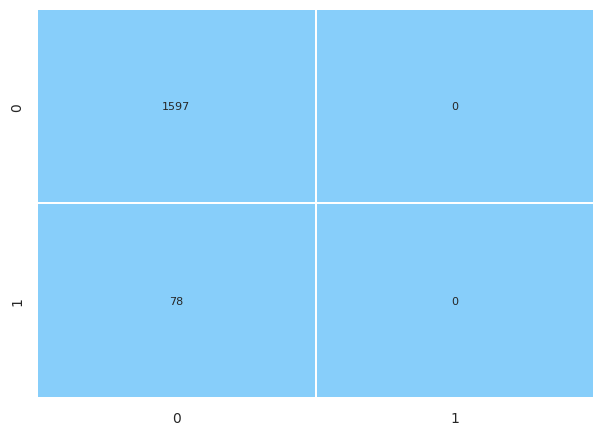

In [ ]:
plot_cm(cm_dt)

In [ ]:
def calculateMetrics(cm, y_test, y_pred):
  TN = cm[0,0]
  TP = cm[1,1]
  FP = cm[0,1]
  FN = cm[1,0]

  precision = TP / (TP+FP)
  recall = TP / (TP+FN)
  specificity = TN / (TN+FP)
  f1_score = 2*((precision*recall)/(precision+recall))
  accuracy = (TN+TP) / (TN+FP+FN+TP)
  acc_table = classification_report(y_test, y_pred, zero_division=1)
  print(acc_table)

In [ ]:
metrics_dt = calculateMetrics(cm_dt, y_test, y_pred_dt)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1597
           1       1.00      0.00      0.00        78

    accuracy                           0.95      1675
   macro avg       0.98      0.50      0.49      1675
weighted avg       0.96      0.95      0.93      1675



invalid value encountered in long_scalars


In [ ]:
from collections import Counter

counter = Counter(y_train)
print('Before',counter)
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({'wildfire': 1})
After Counter({'wildfire': 1})


In [ ]:
counter1 = Counter(y_train)
print('Before',counter1)

rus = RandomUnderSampler()

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
counter1 = Counter(y_train_rus)
print('After',counter1)

Before Counter({'wildfire': 1})
After Counter({'wildfire': 1})


In [ ]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [ ]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob = clf_model.predict_proba(X_test)
    y_pred_prob = y_prob[:, 1]  # Probability of belonging to class 1
    y_pred_binary = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary

    print('Confusion Matrix')
    print('=' * 60)
    print(confusion_matrix(y_test, y_pred_binary), "\n")
    print('Classification Report')
    print('=' * 60)
    print(classification_report(y_test, y_pred_binary, zero_division=1), "\n")
    print('AUC-ROC')
    print('=' * 60)
    print(roc_auc_score(y_test, y_pred_prob))

    print('model', model)

    model.append(algo)
    precision.append(precision_score(y_test, y_pred_binary, zero_division=1))
    recall.append(recall_score(y_test, y_pred_binary, zero_division=1))
    F1score.append(f1_score(y_test, y_pred_binary, zero_division=1))
    AUCROC.append(roc_auc_score(y_test, y_pred_prob))
    resample.append(sampling)


In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

In [ ]:
# Create a DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Define the parameter grid with a range of 'max_depth' values
tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 11),  # Search 'max_depth' from 1 to 10
    'min_samples_split': [2, 3, 4, 5],
    'max_leaf_nodes': [6],
    'random_state': [10]
}

# Create RandomizedSearchCV
clf_DT = RandomizedSearchCV(dt_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit the model
clf_DT.fit(X_train, y_train)

# Get the best estimator
best_dt_estimator = clf_DT.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'actual')

Confusion Matrix
[[1597    0]
 [  78    0]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1597
           1       1.00      0.00      0.00        78

    accuracy                           0.95      1675
   macro avg       0.98      0.50      0.49      1675
weighted avg       0.96      0.95      0.93      1675
 

AUC-ROC
0.7153195896151439
model []


###random under sampling

In [ ]:
clf_DT.fit(X_train_sm, y_train_sm)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=6,
                       random_state=10)

In [ ]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote')

Confusion Matrix
[[1066  531]
 [  27   51]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.67      0.79      1597
           1       0.09      0.65      0.15        78

    accuracy                           0.67      1675
   macro avg       0.53      0.66      0.47      1675
weighted avg       0.93      0.67      0.76      1675
 

AUC-ROC
0.717832313793491
model ['Decision Tree']


###Random forest

In [ ]:
estimators = [2,10,30,50,100]
max_depth = [i for i in range(5,16,2)]
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
min_samples_leaf = [1, 2, 5]

tree_param_grid = {
'max_depth' :max_depth,
'min_samples_split' : min_samples_split,
'min_samples_leaf' : min_samples_leaf
}

In [ ]:
rf_model = RandomForestClassifier()

rf_params={'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_RF.fit(X_train, y_train)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(max_depth=7, min_samples_split=20)

In [ ]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'actual')

Confusion Matrix
[[1597    0]
 [  78    0]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1597
           1       1.00      0.00      0.00        78

    accuracy                           0.95      1675
   macro avg       0.98      0.50      0.49      1675
weighted avg       0.96      0.95      0.93      1675
 

AUC-ROC
0.8069376876515262
model ['Decision Tree', 'Decision Tree']


###SMOTE resampling

In [ ]:
clf_RF.fit(X_train_sm, y_train_sm)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(max_depth=15, n_estimators=30)

In [ ]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote')

Confusion Matrix
[[1392  205]
 [  43   35]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1597
           1       0.15      0.45      0.22        78

    accuracy                           0.85      1675
   macro avg       0.56      0.66      0.57      1675
weighted avg       0.93      0.85      0.89      1675
 

AUC-ROC
0.7932260809530691
model ['Decision Tree', 'Decision Tree', 'Random Forest']


###random undersampling

In [ ]:
clf_RF.fit(X_train_rus, y_train_rus)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(max_depth=11, min_samples_split=10)

In [ ]:
test_eval(clf_RF, X_test, y_test, 'Decision Tree', 'RandomUnderSampler')

Confusion Matrix
[[1038  559]
 [  15   63]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.65      0.78      1597
           1       0.10      0.81      0.18        78

    accuracy                           0.66      1675
   macro avg       0.54      0.73      0.48      1675
weighted avg       0.94      0.66      0.76      1675
 

AUC-ROC
0.7996162676813898
model ['Decision Tree', 'Decision Tree', 'Random Forest', 'Random Forest']


###Model comparision

In [ ]:
# Check the lengths of the lists or arrays
print("Length of model:", len(model))
print("Length of resample:", len(resample))
print("Length of precision:", len(precision))
print("Length of recall:", len(recall))
print("Length of F1score:", len(F1score))
print("Length of AUCROC:", len(AUCROC))

# Ensure all lists have the same length
if len(model) == len(resample) == len(precision) == len(recall) == len(F1score) == len(AUCROC):
    # Create the DataFrame
    lf_eval_df = pd.DataFrame({
        'model': model,
        'resample': resample,
        'precision': precision,
        'recall': recall,
        'f1-score': F1score,
        'AUC-ROC': AUCROC
    })
else:
    print("Error: Lists have different lengths.")

Length of model: 5
Length of resample: 5
Length of precision: 5
Length of recall: 5
Length of F1score: 5
Length of AUCROC: 5


In [ ]:
lf_eval_df

,model,resample,precision,recall,f1-score,AUC-ROC
0,Decision Tree,actual,1.000000,0.000000,0.000000,0.715320
1,Decision Tree,smote,0.087629,0.653846,0.154545,0.717832
2,Random Forest,actual,1.000000,0.000000,0.000000,0.806938
3,Random Forest,smote,0.145833,0.448718,0.220126,0.793226
4,Decision Tree,RandomUnderSampler,0.101286,0.807692,0.180000,0.799616


###visualization and data distribution

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
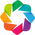

In [ ]:
import holoviews as hv
hv.extension('bokeh')
import hvplot.pandas
import panel as pn
from sklearn.metrics import roc_curve

In [ ]:
def hv_confusion_matrix(y_pred,
                        y_test,
                        title='Confusion matrix'):
    tn, fp, fn, tp = confusion_matrix(y_test,  y_pred).ravel()
    pdf = pd.DataFrame(zip(y_pred, y_train), columns=['Temperature', 'Precipitation'])

    graph = pdf.groupby(['Temperature', 'Precipitation']).size().to_frame().reset_index()
    confusion = graph.rename(columns={0: 'Count'})
    # in a format for holoviews
    conf_values = map(lambda l: [str(l[0]), str(l[1]), l[2]], [a.tolist() for a in confusion.values])
    return hv.HeatMap(conf_values, label='Confusion Matrix', kdims=['Temperature', 'Precipitation'], vdims=['Count']).sort().options(
        xrotation=45, width=500, height=500, cmap='blues', tools=['hover'], invert_yaxis=True, zlim=(0,1))

In [ ]:
def hv_roc_curve(y_pred, y_test):
  fpr, tpr, _ = roc_curve(y_test,  y_pred)
  roc_df = pd.DataFrame(zip(fpr, tpr), columns=['Temperature', 'Precipitation'])
  return roc_df.hvplot(x='Temperature', y = 'Precipitation')

In [ ]:
def upsample(df, n):
  df = resample(df, n_samples=n, replace=True)
  return df
def downsample(df, n):
  df = resample(df, n_samples=n, replace=False)
  return df

in def


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


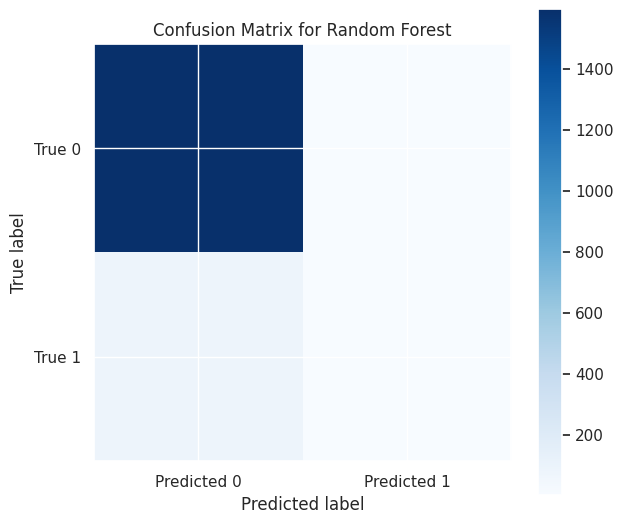

in def


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


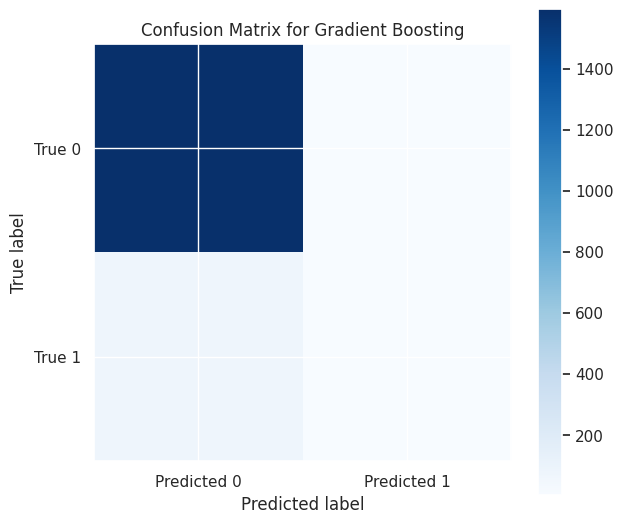

in def


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


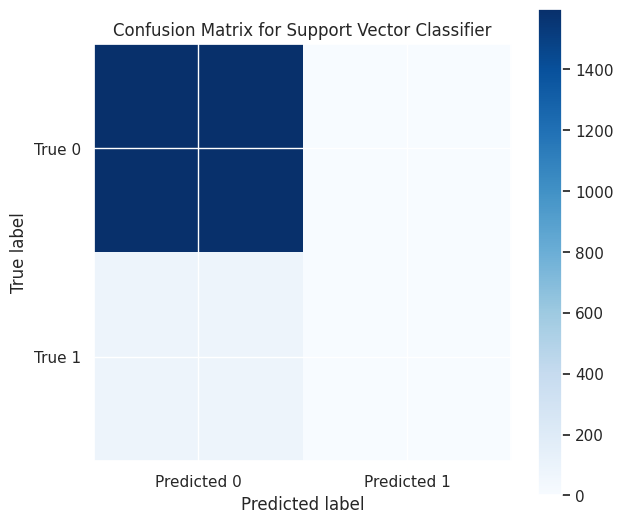

in def


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


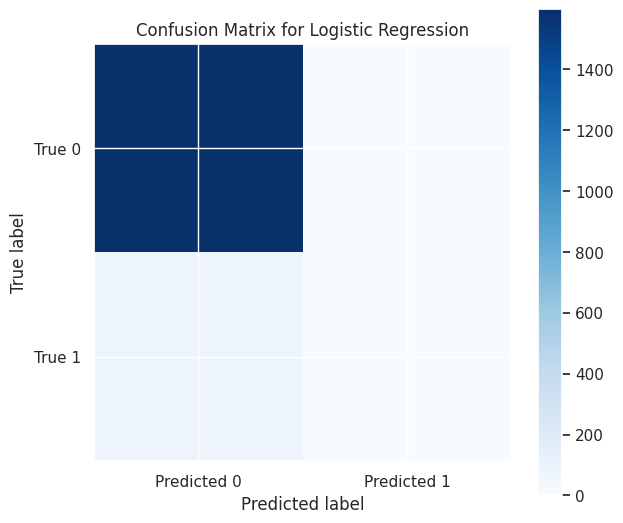

in def


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


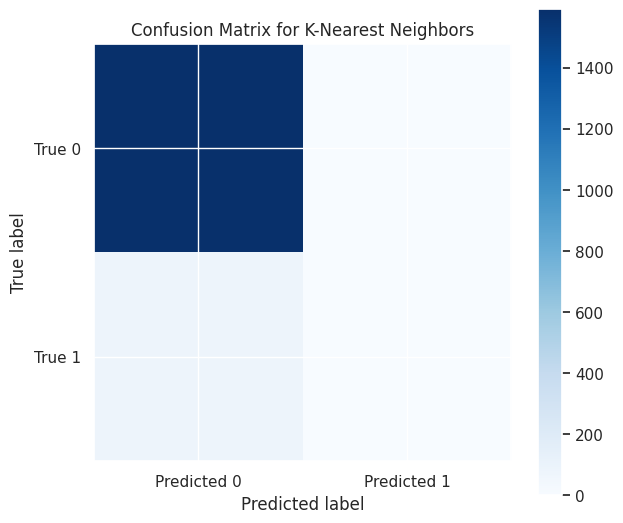

In [ ]:
# Define a list of classifiers and their names
classifiers = [
    (RandomForestClassifier(), 'Random Forest'),
    (GradientBoostingClassifier(), 'Gradient Boosting'),
    (SVC(), 'Support Vector Classifier'),
    (LogisticRegression(), 'Logistic Regression'),
    (KNeighborsClassifier(), 'K-Nearest Neighbors')
]

# Function to plot confusion matrix for each classifier
def plot_confusion_matrix(classifier, name):
    print("in def")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
   # print("in plt")
    plt.title(f'Confusion Matrix for {name}')
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
    plt.yticks([0, 1], ['True 0', 'True 1'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
   # print("in show")
    plt.show()

# Loop through classifiers and plot confusion matrix for each
for classifier, name in classifiers:
    #print("in class")
    plot_confusion_matrix(classifier, name)


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
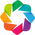

[[1577    8]
 [  86    4]]


Row
    [0] Select(name='Algorithm', options=['Nearest Neighbors', ...], value='Nearest Neighbors')
    [1] IntSlider(end=2, name='Up Sample(0) -...)
    [2] ParamFunction(function, _pane=HoloViews, defer_load=False)

In [ ]:
hv.extension('bokeh')
select = pn.widgets.Select(options=["Nearest Neighbors", "Decision Tree", "Random Forest", "Neural Net" , "AdaBoost"], name = "Algorithm")
slider = pn.widgets.IntSlider(name= 'Up Sample(0) - Without Sample(1) -Down Sample(2)', start=0, end=2, step =1)

def mpl_plot(df):
    return df.hvplot.heatmap(x='columns', y='index',
                  height=500, width=500, colorbar=False)

@pn.depends(select, slider)
def exp_plot(select, slider):
  if(slider == 0):
    cm = confusion_matrix_up[select]
  else:
    cm =confusion_matrix_down[select]

  print(cm)
  df = pd.DataFrame(cm)
  df = pd.DataFrame(cm, columns = ['Temperature','Precipitation'])
  df["PredictedValues"] =  ['Temperature','Precipitation']

  df = df.set_index(["PredictedValues"])
  return df.hvplot.heatmap(x='columns', y='index',
                  height=500, width=500, colorbar=False)

interactive = pn.bind(exp_plot, select=select, slider=slider)

pn.Row(select, slider, interactive)

##Multi-Layer Perceptron Neural Network with Keras

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
168/168 [==============================] - 2s 4ms/step - loss: 0.2413 - accuracy: 0.9502 - val_loss: 0.1890 - val_accuracy: 0.9448
Epoch 2/50
1

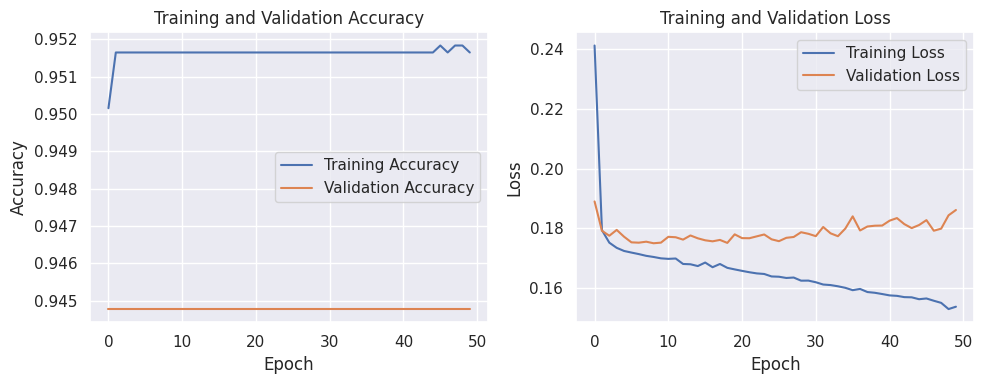

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X, y = merged_df[['temp_norm', 'precip_norm', 'PDSI', 'PHDI', 'PDMI', 'Palmer_Z-Index', 'county', 'FDI',
       'fuel_moisture']], merged_df[['wildfire']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Sequential model
model = Sequential()

# Add input layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

# Train the model and capture the training history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


above Keras model predicts wildfire correctly with very little test loss and high test accuracy

##HeatMap for enriched dataset with Latent variables

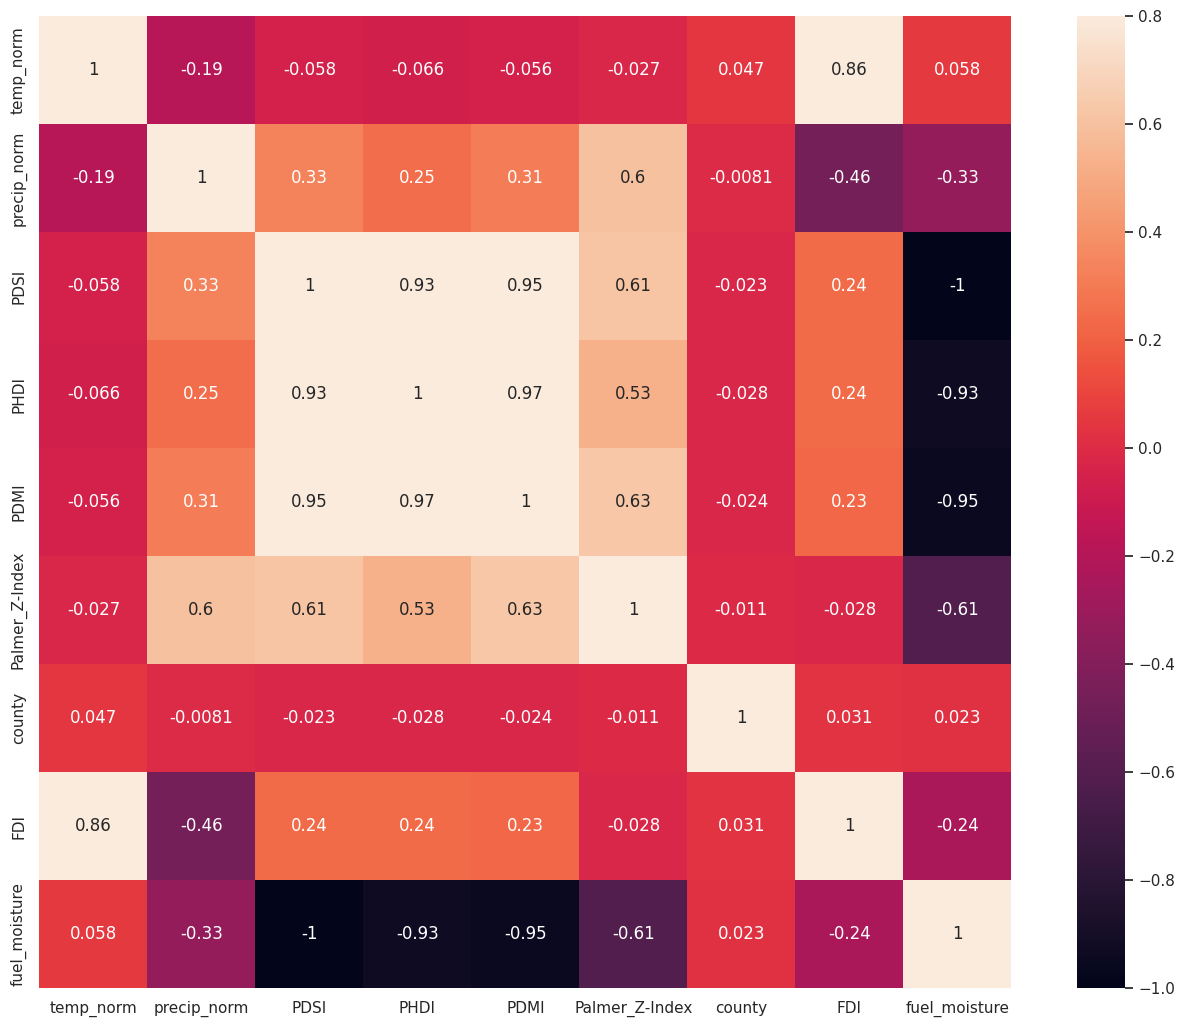

In [ ]:
ds_latent_vars = merged_df[['temp_norm', 'precip_norm', 'PDSI', 'PHDI', 'PDMI', 'Palmer_Z-Index', 'county', 'FDI',
       'fuel_moisture']]

import seaborn as sns
corrmat = ds_latent_vars.corr(method='pearson')
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,color = 'black');
plt.plot(ax = ax)
plt.show()

#Conclusion of various experiments we have conducted

##Predicting wilfdires using Classification

##Linear SVM

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1597
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1675
   macro avg       0.48      0.50      0.49      1675
weighted avg       0.91      0.95      0.93      1675



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


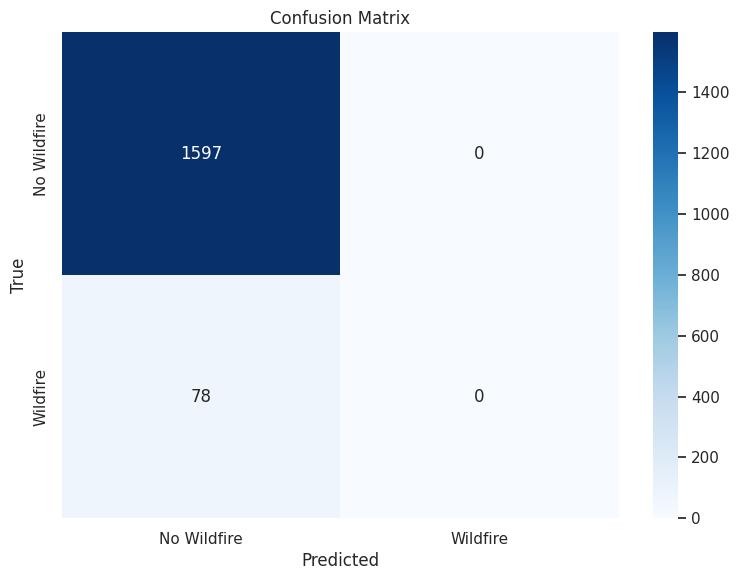

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X, y = merged_df[['temp_norm', 'precip_norm', 'PDSI', 'PHDI', 'PDMI', 'Palmer_Z-Index', 'county', 'FDI',
       'fuel_moisture']], merged_df[['wildfire']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Linear SVM classifier
svm = SVC(kernel='linear')

# Train the classifier on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Wildfire', 'Wildfire'], yticklabels=['No Wildfire', 'Wildfire'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1597
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1675
   macro avg       0.48      0.50      0.49      1675
weighted avg       0.91      0.95      0.93      1675



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


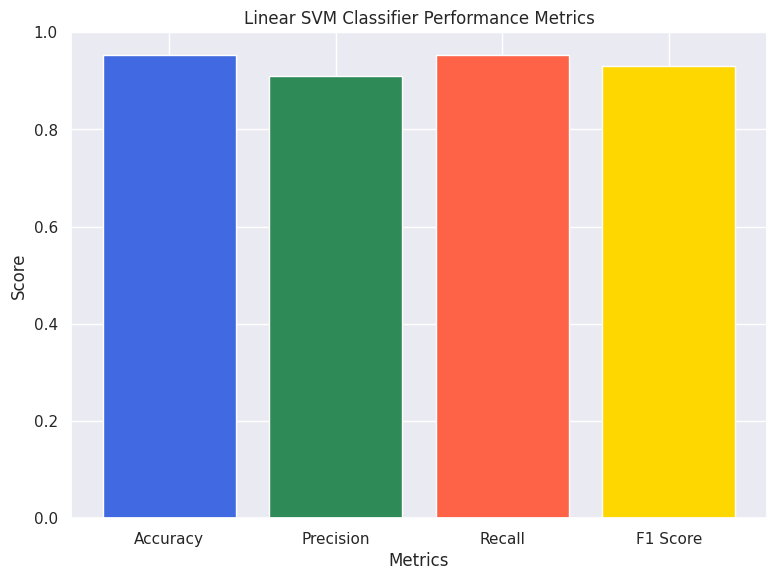

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X, y = merged_df[['temp_norm', 'precip_norm', 'PDSI', 'PHDI', 'PDMI', 'Palmer_Z-Index', 'county', 'FDI',
       'fuel_moisture']], merged_df[['wildfire']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Linear SVM classifier
svm = SVC(kernel='linear')

# Train the classifier on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

# Create a bar graph to visualize the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy] + [float(value) for value in classification_report(y_test, y_pred, output_dict=True)['weighted avg'].values()][:-1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['royalblue', 'seagreen', 'tomato', 'gold'])
plt.ylim(0, 1)
plt.title('Linear SVM Classifier Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


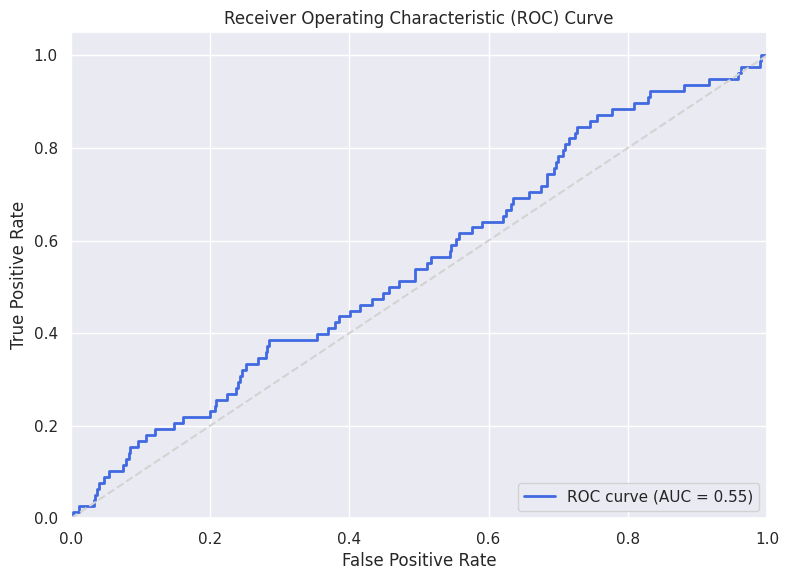

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score

X, y = merged_df[['temp_norm', 'precip_norm', 'PDSI', 'PHDI', 'PDMI', 'Palmer_Z-Index', 'county', 'FDI',
       'fuel_moisture']], merged_df[['wildfire']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Linear SVM classifier
svm = SVC(kernel='linear', probability=True)  # Set probability=True for ROC curve

# Train the classifier on the training data
svm.fit(X_train, y_train)

# Get predicted probabilities for class 1 (wildfire)
y_prob = svm.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Create a ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='royalblue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='lightgray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


##Muller loop on final dataset

In [ ]:
from sklearn import metrics

X, y = merged_df[['temp_norm', 'precip_norm', 'PDSI', 'PHDI', 'PDMI', 'Palmer_Z-Index', 'county', 'FDI',
       'fuel_moisture']], merged_df[['wildfire']]

X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=42)

muller_loop(X_train, X_test, y_train, y_test)

Regressor = Linear Regression, Score (test, accuracy) = 3.01
Regressor = MLP Regressor, Score (test, accuracy) = -0.23
Regressor = RandomForest Regressor, Score (test, accuracy) = 4.41
Regressor = Gradient Boosting Regressor, Score (test, accuracy) = 8.27
Regressor = KNeighbors Regressor, Score (test, accuracy) = -35.48
Regressor = Logistic Regression, Score (test, accuracy) = 95.34
Best --> Regressor = Logistic Regression, Score (test, accuracy) = 95.34


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


##Logistic Regression
SMOTHE applied to control imbalanced data

In [ ]:
X, y = merged_df[['temp_norm', 'precip_norm', 'PDSI', 'PHDI', 'PDMI', 'Palmer_Z-Index', 'FDI', 'fuel_moisture', 'county', 'year']], merged_df[['wildfire']]

X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = 100 * accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

# Print the performance metrics
print("Accuracy:", accuracy)
print('confusion matrix : \n', confusion_matrix(y_test, y_pred))


Accuracy: 61.31343283582089
confusion matrix : 
 [[961 636]
 [ 12  66]]


##Predict the counties which are more prone to wildfire

In [ ]:
# Apply the trained model to make predictions
predictions = model.predict(X_test)
prediction_probabilities = model.predict_proba(X_test)[:, 1]  # Probability of wildfire occurrence

# Create a DataFrame with predictions for each year and county
county_predictions = pd.DataFrame({'County': X_test['county'], 'Year': X_test['year'], 'Wildfire Prediction': predictions, 'Probability': prediction_probabilities})

# Display the top 10 most wildfire-prone counties based on predicted probabilities
N = 10
top_prone_counties = county_predictions.nlargest(N, 'Probability')

print(f"Top {N} Most Wildfire-Prone Counties:")
print(top_prone_counties)



Top 10 Most Wildfire-Prone Counties:
      County  Year  Wildfire Prediction  Probability
1061      17  2011                    1     0.905765
1047       3  2011                    1     0.904908
1075      31  2011                    1     0.898926
315       25  2010                    1     0.897248
1074      30  2011                    1     0.877555
1147      45  2011                    1     0.876859
393       45  2010                    1     0.866544
1046       2  2011                    1     0.856517
6695      25  2019                    1     0.856280
7507      25  2020                    1     0.854674


In [ ]:
counties_get = merged_df[['county', 'county_str']]
counties_get = counties_get.drop_duplicates()

In [ ]:
top_prone_counties = pd.merge(top_prone_counties, counties_get, left_on='County', right_on='county', how='inner')
top_prone_counties

,County,Year,Wildfire Prediction,Probability,county,county_str
0,17,2011,1,0.905765,17,Lassen County
1,3,2011,1,0.904908,3,Butte County
2,31,2011,1,0.898926,31,Plumas County
3,25,2010,1,0.897248,25,Mono County
4,25,2019,1,0.856280,25,Mono County
5,25,2020,1,0.854674,25,Mono County
6,30,2011,1,0.877555,30,Placer County
7,45,2011,1,0.876859,45,Sierra County
8,45,2010,1,0.866544,45,Sierra County
9,2,2011,1,0.856517,2,Amador County


#Distributions of your Data

The data distributions and visualization of our data is under Exploratory data analysis and visualization https://colab.research.google.com/drive/1uPO5HKwsA33BSl6o1sR_wze4-pbDJyjC#scrollTo=AjBTs_2tTX8P

#Conclusion

- We have predicted the counties which are more prone to wildfires using the final dataset with Latent variables.
  These counties are more prone:
```
    Amador County
    Butte County
    Lassen County
    Mono County
    Placer County
    Plumas County
    Sierra County

- The relationship can be observed on a scatterplot for each year showing how the relationship changes differs for the last 12 years. It can be observed that when the temperature is above 60°F there is always low precipitation.
- Oversampling our data gives us a better model.
- What are the worst and best distributions of your datasets?
  - Best: Oversampling
  - Worst: Undersampling
- What properties should I invest in on the basis of how prone that region is to wildfires?
  - Certainly, investing in properties in the above-mentioned counties would be riskier.



